# **Clonotype Analysis**
The goal of this notebook is to take the generated data from sonia and convert it into a clonotype matrix that can be fed into recon.

It will also do an analysis/in-depth look at the clonotype distributions

# Imports & Google Drive

In [ ]:
!pip install scikit-bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 29.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.9 MB/s eta 0:00:00
  Created wheel for scikit-bio: filename=scikit_bio-0.5.8-cp310-cp310-linux_x86_64.whl size=2670807 sha256=3571bc64b410e003d73e44e902f3954348ed174e6fdfd545e05dba81d1855db8
  Stored in directory: /root/.cache/pip/wheels/e8/5c/a6/323c02049541684538df2610cc63f0157ecb8995cac53667d3
  Created wheel for hdmedians: filename=hdmedians-0.14.2-cp310-cp310-linux_x86_64.whl size=672879 sha256=d79a6a8b407778da5694b21e5f4dbe01e0d4d8c7df08a4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from skbio.diversity.alpha import shannon, pielou_e

from google.colab import drive
from pathlib import Path
import os

In [ ]:
drive.mount('/content/drive')
!ls
PATH = "/content/drive/MyDrive/Data Science/Thesis/SONIA_data"
os.chdir(PATH)

Mounted at /content/drive
drive  sample_data


In [ ]:
pwd

'/content/drive/MyDrive/Data Science/Thesis/SONIA_data'

# TCRdb

## Cleaning

In [ ]:
df_tcr = pd.read_csv('df_tcr')
df_tcr.head()

,AASeq,cloneFraction,sample,size
0,CASRYLSRGGIPDRVNTEAFF,0.008281,SRR5676665,8280
1,CSADRGTEAFF,0.006169,SRR5676665,6168
2,CAWTLDSNQPQHF,0.003568,SRR5676665,3567
3,CSGLTDTQYF,0.003455,SRR5676665,3455
4,CSVGQPAAQYF,0.003340,SRR5676665,3340


In [ ]:
# first we need to combine all of the AASeq matches and sum the sizes for it
print(len(df_tcr))
print(len(np.unique(df_tcr['AASeq'])))

165400
142770


In [ ]:
aggregation_functions = {'AASeq': 'first', 'cloneFraction': 'sum', 'sample': 'first', 'size': 'sum'}
df_tcr_new = df_tcr.groupby(df_tcr['AASeq']).aggregate(aggregation_functions)
print(len(df_tcr_new)) # check that it's the correct length

142770


In [ ]:
df_tcr_new = df_tcr_new.drop(columns=['cloneFraction', 'sample', 'AASeq'])

## Clonotype Analysis

In [ ]:
tcr_seq_occ = df_tcr_new['size'].value_counts().to_frame()
tcr_seq_occ = tcr_seq_occ.reset_index()
tcr_seq_occ.head()

,index,size
0,76,6584
1,84,4037
2,67,2925
3,71,2907
4,11,2723


In [ ]:
print(tcr_seq_occ['size'].astype(float).nunique())
print(tcr_seq_occ['index'].astype(float).nunique())
print(len(tcr_seq_occ))

233
2146
2146


In [ ]:
tcr_seq_occ

,index,size
0,76,6584
1,84,4037
2,67,2925
3,71,2907
4,11,2723
...,...,...
2141,1239,1
2142,1989,1
2143,2037,1
2144,1404,1


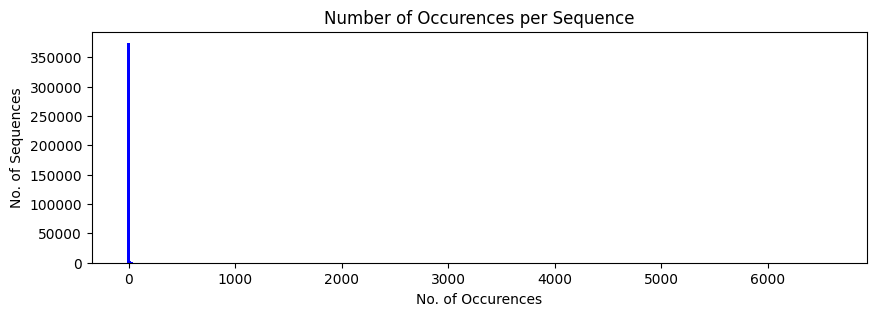

In [ ]:
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(tcr_seq_occ['size'], tcr_seq_occ['index'], color ='blue', width = 30)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

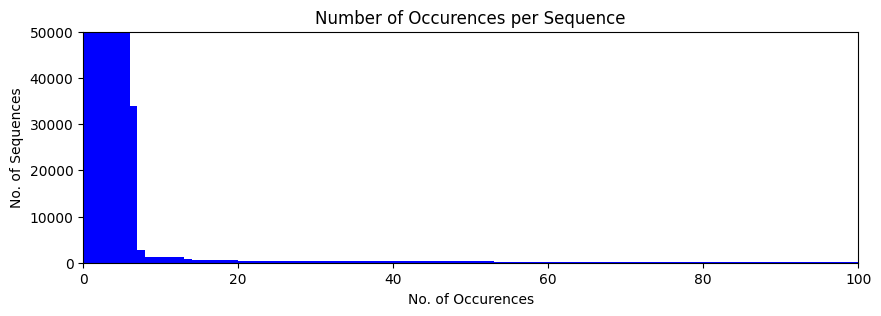

In [ ]:
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(tcr_seq_occ['size'], tcr_seq_occ['index'], color ='blue', width = 10)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
plt.ylim(0, 50000)
plt.xlim(0, 100)
plt.title("Number of Occurences per Sequence")
plt.show()

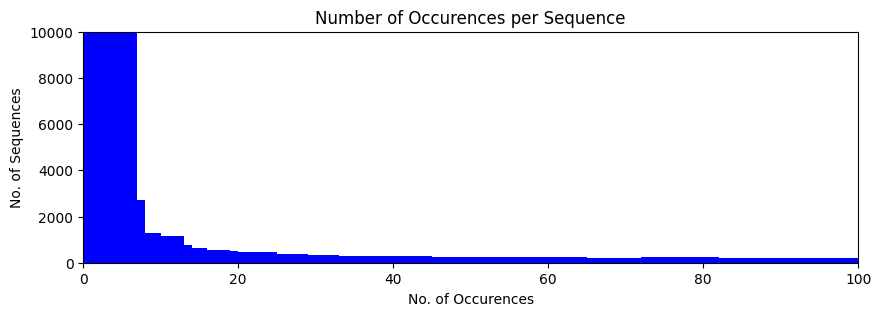

In [ ]:
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(tcr_seq_occ['size'], tcr_seq_occ['index'], color ='blue', width = 10)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
plt.ylim(0, 10000)
plt.xlim(0, 100)
plt.title("Number of Occurences per Sequence")
plt.show()

## Formatting for Recon

In [ ]:
tcr_seq_occ = tcr_seq_occ[['index', 'size']]
tcr_seq_occ.head()

,index,size
0,76,6584
1,84,4037
2,67,2925
3,71,2907
4,11,2723


In [ ]:
print(tcr_seq_occ.shape)

# saving to file, readable by recon functions
tcr_seq_occ.to_csv('df_fill_in_tcr.tsv', sep='\t', index=False, header=False)

(2146, 2)


## Rarefaction

In [ ]:
tcr_seq_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_tcr.tsv', sep='\t', header=None)
tcr_seq_occ = tcr_seq_occ.set_axis(['index', 'size'], axis=1, inplace=False)
tcr_seq_occ.head()

<ipython-input-4-7243329f7afb>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  tcr_seq_occ = tcr_seq_occ.set_axis(['index', 'size'], axis=1, inplace=False)


,index,size
0,76,6584
1,84,4037
2,67,2925
3,71,2907
4,11,2723


In [ ]:
print(sum(tcr_seq_occ['index']*tcr_seq_occ['size']))
print(sum(tcr_seq_occ['size']))

21902796
142770


In [ ]:
tcr_size = np.repeat(tcr_seq_occ['index'].values, tcr_seq_occ['size'].values)
tcr_size2 = np.repeat(np.arange(1, len(tcr_size)+1), tcr_size)
np.random.shuffle(tcr_size2)

In [ ]:
len(tcr_size2)//50000
# the code below will produce 438 datapoints

438

In [ ]:
len(tcr_size2)

21902796

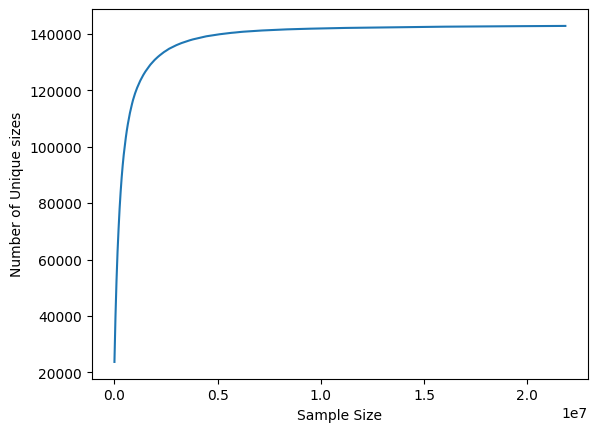

In [ ]:
# calculate the number of unique elements for every 50000 samples
step_size = 50000
num_steps = len(tcr_size2) // step_size
unique_tcr = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(tcr_size2[:end_index], return_counts=True)
    unique_tcr[i] = len(counts)

# save to csv
np.savetxt("unique_tcr.csv", unique_tcr, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 50000*(len(unique_tcr)), 50000), unique_tcr)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

## Traditional Diversity Measures

In [ ]:
tcr_seq_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_tcr.tsv', sep='\t', header=None)
tcr_seq_occ = tcr_seq_occ.set_axis(['index', 'size'], axis=1, inplace=False)
tcr_seq_occ.head()

<ipython-input-5-7243329f7afb>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  tcr_seq_occ = tcr_seq_occ.set_axis(['index', 'size'], axis=1, inplace=False)


,index,size
0,76,6584
1,84,4037
2,67,2925
3,71,2907
4,11,2723


In [ ]:
# Shanon's Entropy Index
counts_tcr = np.repeat(tcr_seq_occ['index'], tcr_seq_occ['size'])
shannon(counts_tcr)

13.838183930908777

In [ ]:
# Evenness
pielou_e(counts_tcr)

0.8081477864365507

In [ ]:
# Speices Richness
sum(tcr_seq_occ['size'])

142770

# SONIA: Set 1

## Cleaning

In [ ]:
df1 = pd.read_csv('df1')
len(df1)

5000000

In [ ]:
df1 = df1.drop(columns=['V', 'J', 'fullSeq'])
df1.head()

,AASeq
0,CASSLTPSQPQHF
1,CASSGSYEQYF
2,CASRRDRGNTEAFF
3,CASSSGTSRYEQYF
4,CASSYGASNQPQHF


In [ ]:
df1 = pd.read_csv('df1').drop(columns=['V', 'J', 'fullSeq'])
df2 = pd.read_csv('df2').drop(columns=['V', 'J', 'fullSeq'])
df3 = pd.read_csv('df3').drop(columns=['V', 'J', 'fullSeq'])
df4 = pd.read_csv('df4').drop(columns=['V', 'J', 'fullSeq'])
df5 = pd.read_csv('df5').drop(columns=['V', 'J', 'fullSeq'])
df6 = pd.read_csv('df6').drop(columns=['V', 'J', 'fullSeq'])
df7 = pd.read_csv('df7').drop(columns=['V', 'J', 'fullSeq'])
df8 = pd.read_csv('df8').drop(columns=['V', 'J', 'fullSeq'])
df9 = pd.read_csv('df9').drop(columns=['V', 'J', 'fullSeq'])
df10 = pd.read_csv('df10').drop(columns=['V', 'J', 'fullSeq'])
df11 = pd.read_csv('df11').drop(columns=['V', 'J', 'fullSeq'])
df12 = pd.read_csv('df12').drop(columns=['V', 'J', 'fullSeq'])
df13 = pd.read_csv('df13').drop(columns=['V', 'J', 'fullSeq'])
df14 = pd.read_csv('df14').drop(columns=['V', 'J', 'fullSeq'])
df15 = pd.read_csv('df15').drop(columns=['V', 'J', 'fullSeq'])
df16 = pd.read_csv('df16').drop(columns=['V', 'J', 'fullSeq'])
df17 = pd.read_csv('df17').drop(columns=['V', 'J', 'fullSeq'])
df18 = pd.read_csv('df18').drop(columns=['V', 'J', 'fullSeq'])
df19 = pd.read_csv('df19').drop(columns=['V', 'J', 'fullSeq'])
df20 = pd.read_csv('df20').drop(columns=['V', 'J', 'fullSeq'])

In [ ]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
          df11, df12, df13, df14, df15, df16, df17, df18,
          df19, df20]

df_all = pd.concat(frames)

In [ ]:
df_all.to_csv('df_all.csv', index=False)

In [ ]:
df_all = pd.read_csv('df_all.csv')

## Traditional Diversity Measures

Shannon's Diversity Index: http://scikit-bio.org/docs/0.4.2/generated/generated/skbio.diversity.alpha.shannon.html

In [ ]:
# Species Richness
df_all['AASeq'].nunique()

In [ ]:
# Shannon's Diversity Index


## Clonotype Analysis

In [ ]:
df_seq_occ = df_all['AASeq'].value_counts()
df_seq_occ = df_seq_occ.value_counts().to_frame()
df_seq_occ = df_seq_occ.reset_index()
df_seq_occ

,index,AASeq
0,1,42611585
1,2,4884293
2,3,1597540
3,4,796374
4,5,478583
...,...,...
1503,1300,1
1504,1298,1
1505,1297,1
1506,1295,1


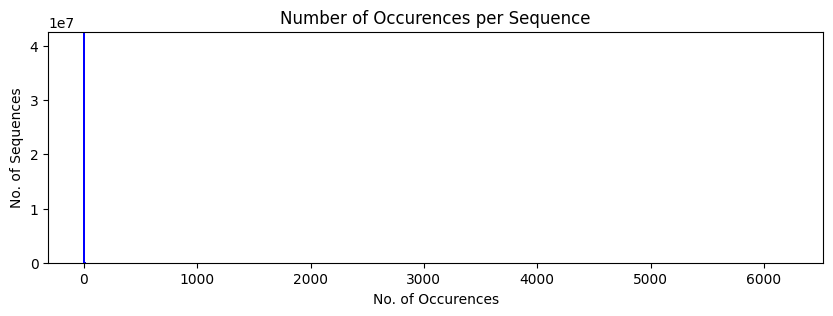

In [ ]:
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(df_seq_occ['index'], df_seq_occ['AASeq'], color ='blue', width = 12)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

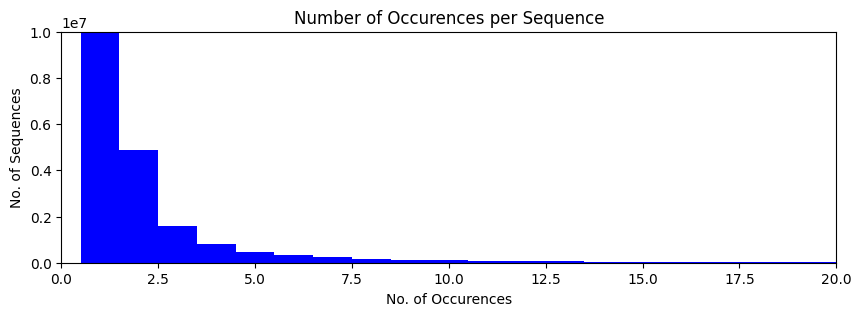

In [ ]:
# zooming in on the left of the graph
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(df_seq_occ['index'], df_seq_occ['AASeq'], color ='blue', width = 1)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
plt.ylim(0, 1e7)
plt.xlim(0, 20)
plt.title("Number of Occurences per Sequence")
plt.show()

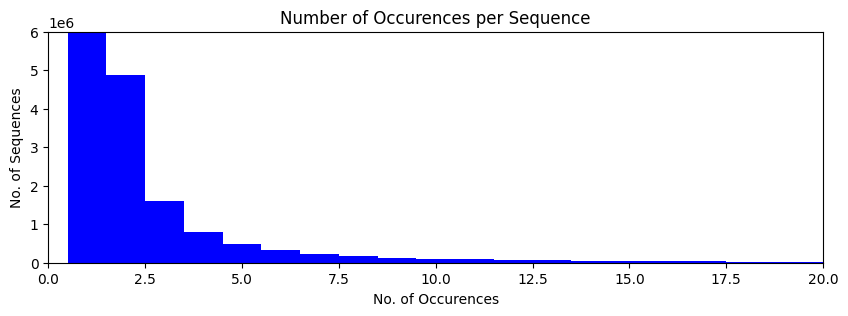

In [ ]:
# zooming in on the y axis
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(df_seq_occ['index'], df_seq_occ['AASeq'], color ='blue', width = 1)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
plt.ylim(0, 6000000)
plt.xlim(0, 20)
plt.title("Number of Occurences per Sequence")
plt.show()

## Formatting for Recon

We no longer care about what the exact sequences are, but rather how many occurences there are of each sequence

In [ ]:
print(df_seq_occ.shape)
df_seq_occ.head()

(1508, 2)


,index,AASeq
0,1,42611585
1,2,4884293
2,3,1597540
3,4,796374
4,5,478583


In [ ]:
# saving to file, readable by recon functions
df_seq_occ.to_csv('df_fill_in_1all.tsv', sep='\t', index=False, header=False)

## Rarefaction

In [ ]:
df_seq_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_1all.tsv', sep='\t', header=None)

In [ ]:
df_seq_occ = df_seq_occ.set_axis(['index', 'size'], axis=1, inplace=False)
df_seq_occ.head()

<ipython-input-9-ef14309da814>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_seq_occ = df_seq_occ.set_axis(['index', 'size'], axis=1, inplace=False)


,index,size
0,1,42611585
1,2,4884293
2,3,1597540
3,4,796374
4,5,478583


In [ ]:
(df_seq_occ['index']*df_seq_occ['size']).sum()

100000000

In [ ]:
df_size = np.repeat(df_seq_occ['index'].values, df_seq_occ['size'].values)
df_size2 = np.repeat(np.arange(1, len(df_size)+1), df_size)
np.random.shuffle(df_size2)

In [ ]:
len(np.unique(df_size2))

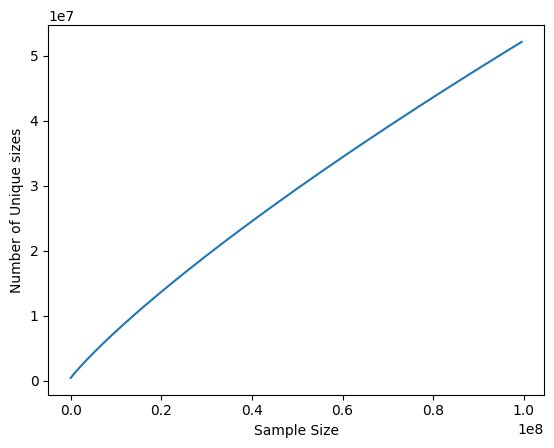

In [ ]:
# calculate the number of unique elements for every 500000 samples
step_size = 500000
num_steps = len(df_size2) // step_size
unique_df1 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(df_size2[:end_index], return_counts=True)
    unique_df1[i] = len(counts)

# save to csv
np.savetxt("unique_df1.csv", unique_df1, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 500000*(len(unique_df1)), 500000), unique_df1)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

## Traditional Diversity Measures

In [ ]:
sonia1_seq_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_1all.tsv', sep='\t', header=None)
sonia1_seq_occ = sonia1_seq_occ.set_axis(['index', 'size'], axis=1, inplace=False)
sonia1_seq_occ.head()

<ipython-input-17-304244180aa1>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  sonia1_seq_occ = sonia1_seq_occ.set_axis(['index', 'size'], axis=1, inplace=False)


,index,size
0,1,42611585
1,2,4884293
2,3,1597540
3,4,796374
4,5,478583


In [ ]:
# Shanon's Entropy Index
counts_sonia1 = np.repeat(sonia1_seq_occ['index'], sonia1_seq_occ['size'])
shannon(counts_sonia1)

24.233341127631686

In [ ]:
# Evenness
pielou_e(counts_sonia1)

0.9452769439077144

In [ ]:
# Speices Richness
sum(sonia1_seq_occ['size'])

52152541

# SONIA: Set 2

## Cleaning

In [ ]:
df1_2 = pd.read_csv('df1_2')
df2_2 = pd.read_csv('df2_2')
df3_2 = pd.read_csv('df3_2')
df4_2 = pd.read_csv('df4_2')
df5_2 = pd.read_csv('df5_2')
df6_2 = pd.read_csv('df6_2')
df7_2 = pd.read_csv('df7_2')
df8_2 = pd.read_csv('df8_2')
df9_2 = pd.read_csv('df9_2')
df10_2 = pd.read_csv('df10_2')
df11_2 = pd.read_csv('df11_2')
df12_2 = pd.read_csv('df12_2')
df13_2 = pd.read_csv('df13_2')
df14_2 = pd.read_csv('df14_2')
df15_2 = pd.read_csv('df15_2')
df16_2 = pd.read_csv('df16_2')
df17_2 = pd.read_csv('df17_2')
df18_2 = pd.read_csv('df18_2')
df19_2 = pd.read_csv('df19_2')
df20_2 = pd.read_csv('df20_2')

In [ ]:
frames_2 = [df1_2, df2_2, df3_2, df4_2, df5_2, df6_2, df7_2, df8_2, df9_2, df10_2,
          df11_2, df12_2, df13_2, df14_2, df15_2, df16_2, df17_2, df18_2, df19_2, df20_2]

df_all_2 = pd.concat(frames_2)

In [ ]:
df_seq_occ_2 = df_all_2['AASeq'].value_counts()
df_seq_occ_2 = df_seq_occ_2.value_counts().to_frame()
df_seq_occ_2 = df_seq_occ_2.reset_index()
df_seq_occ_2.head()

,index,AASeq
0,1,801956
1,2,33362
2,3,8852
3,4,3585
4,5,1766


## Clonotype Analysis

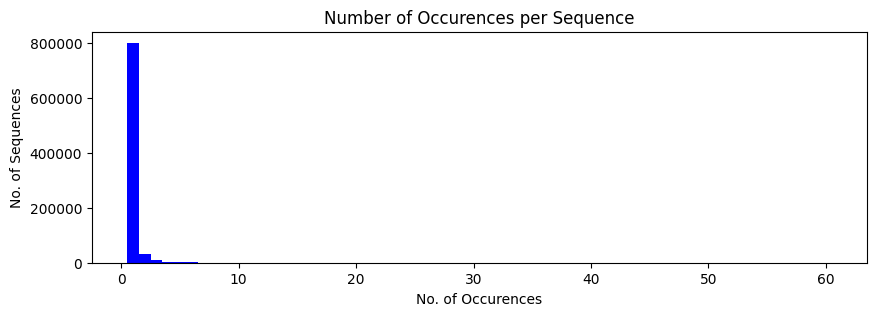

In [ ]:
fig_2 = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(df_seq_occ_2['index'], df_seq_occ_2['AASeq'], color ='blue', width = 1)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 14001697)
plt.title("Number of Occurences per Sequence")
plt.show()

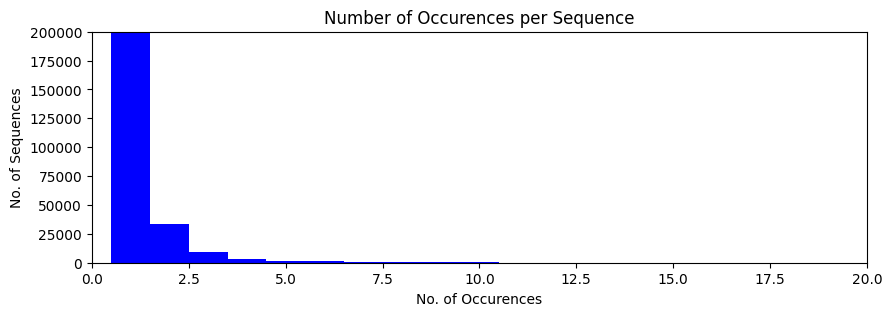

In [ ]:
# zooming in on the left of the graph
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(df_seq_occ_2['index'], df_seq_occ_2['AASeq'], color ='blue', width = 1)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
plt.ylim(0, 200000)
plt.xlim(0, 20)
plt.title("Number of Occurences per Sequence")
plt.show()

## Formatting for Recon

In [ ]:
print(df_seq_occ_2.shape)

(42, 2)


In [ ]:
# saving to file, readable by recon functions
df_seq_occ_2.to_csv('df_fill_in_2all.tsv', sep='\t', index=False, header=False)

## Rarefaction

In [ ]:
df_seq_occ2 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_2all.tsv', sep='\t', header=None)

In [ ]:
df_seq_occ2 = df_seq_occ2.set_axis(['index', 'size'], axis=1, inplace=False)
df_seq_occ2.head()

<ipython-input-5-24d8d00b50bf>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_seq_occ2 = df_seq_occ2.set_axis(['index', 'size'], axis=1, inplace=False)


,index,size
0,1,801956
1,2,33362
2,3,8852
3,4,3585
4,5,1766


In [ ]:
(df_seq_occ2['index']*df_seq_occ2['size']).sum()

950000

In [ ]:
df2_size = np.repeat(df_seq_occ2['index'].values, df_seq_occ2['size'].values)
df2_size2 = np.repeat(np.arange(1, len(df2_size)+1), df2_size)
np.random.shuffle(df2_size2)

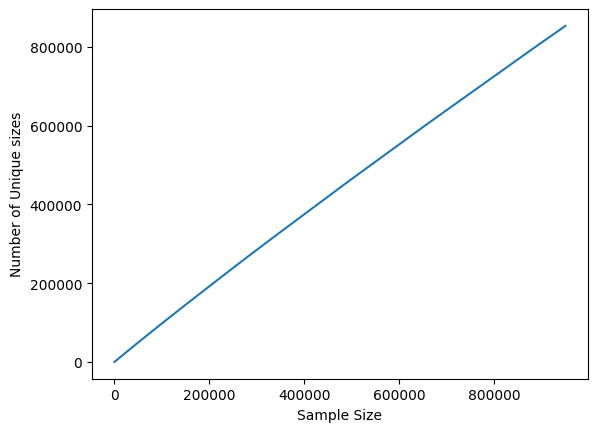

In [ ]:
# calculate the number of unique elements for every 50 samples
step_size = 50
num_steps = len(df2_size2) // step_size
unique_df2 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(df2_size2[:end_index], return_counts=True)
    unique_df2[i] = len(counts)

# save to csv
np.savetxt("unique_df2.csv", unique_df2, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 50*(len(unique_df2)), 50), unique_df2)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

## Traditional Diversity Measures

In [ ]:
sonia2_seq_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_2all.tsv', sep='\t', header=None)
sonia2_seq_occ = sonia2_seq_occ.set_axis(['index', 'size'], axis=1, inplace=False)
sonia2_seq_occ.head()

<ipython-input-22-5e60921476dc>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  sonia2_seq_occ = sonia2_seq_occ.set_axis(['index', 'size'], axis=1, inplace=False)


,index,size
0,1,801956
1,2,33362
2,3,8852
3,4,3585
4,5,1766


In [ ]:
# Shanon's Entropy Index
counts_sonia2 = np.repeat(sonia2_seq_occ['index'], sonia2_seq_occ['size'])
shannon(counts_sonia2)

19.58020335502752

In [ ]:
# Evenness
pielou_e(counts_sonia2)

0.9938110524891285

In [ ]:
# Speices Richness
sum(sonia2_seq_occ['size'])

852972

# Uniform Population: Species Richness 100,000

## Uniform Population: 10,000

### Cleaning

In [ ]:
df_unif_s10_000 = pd.read_csv('unif_s10_000.tsv')
df_unif_s10_000.head()

,AASeq,size
0,species71909,1
1,species36510,1
2,species67991,1
3,species16095,1
4,species732,1


In [ ]:
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
df_unif_s10_000 = df_unif_s10_000.groupby(df_unif_s10_000['AASeq']).aggregate(aggregation_functions)
df_unif_s10_000 = df_unif_s10_000.reset_index(drop=True)
df_unif_s10_000.head()

,AASeq,size
0,species10005,1
1,species10020,1
2,species10028,1
3,species1003,1
4,species10037,1


### Clonotype Analysis

In [ ]:
unif_s10_000_occ = df_unif_s10_000['size'].value_counts().to_frame()
unif_s10_000_occ = unif_s10_000_occ.reset_index()
unif_s10_000_occ.head()

,index,size
0,1,8792
1,2,564
2,3,24
3,4,2


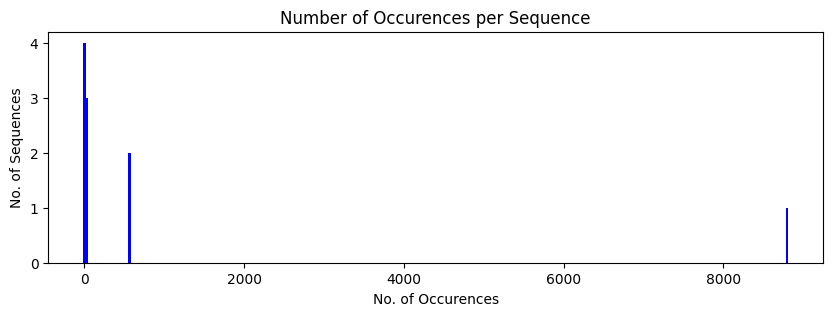

In [ ]:
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(unif_s10_000_occ['size'], unif_s10_000_occ['index'], color ='blue', width=30)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
unif_s10_000_occ = unif_s10_000_occ[['index', 'size']]
unif_s10_000_occ.head()

,index,size
0,1,8792
1,2,564
2,3,24
3,4,2


In [ ]:
print(unif_s10_000_occ.shape)

# saving to file, readable by recon functions
unif_s10_000_occ.to_csv('df_fill_in_unif_10_000.tsv', sep='\t', index=False, header=False)

(4, 2)


### Rarefaction

In [ ]:
unif_s10_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_10_000.tsv', sep='\t', header=None)

In [ ]:
unif_s10_000_occ = unif_s10_000_occ.set_axis(['index', 'size'], axis=1)
unif_s10_000_occ.head()

,index,size
0,1,8792
1,2,564
2,3,24
3,4,2


In [ ]:
size_s10000 = np.repeat(unif_s10_000_occ['index'].values, unif_s10_000_occ['size'].values)
size2_s10000 = np.repeat(np.arange(1, len(size_s10000)+1), size_s10000)
np.random.shuffle(size2_s10000)

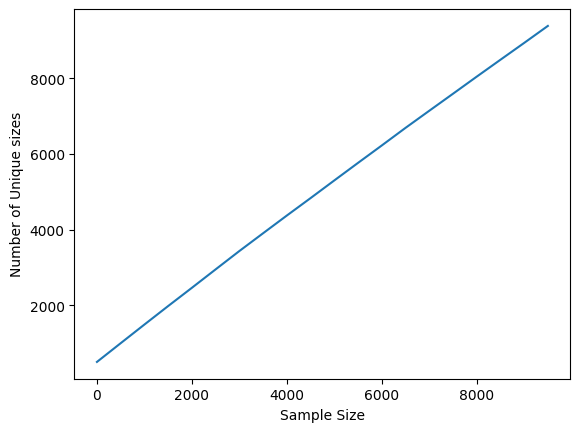

In [ ]:
# calculate the number of unique elements for every 5000 samples
step_size = 500
num_steps = len(size2_s10000) // step_size
unique_s10_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size2_s10000[:end_index], return_counts=True)
    unique_s10_000[i] = len(counts)

# save to csv
np.savetxt("unique_s10_000.csv", unique_s10_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 500*(len(unique_s10_000)), 500), unique_s10_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [ ]:
unif_s10_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_10_000.tsv', sep='\t', header=None)
unif_s10_000_occ = unif_s10_000_occ.set_axis(['index', 'size'], axis=1, inplace=False)
unif_s10_000_occ.head()

<ipython-input-26-fe798973737e>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  unif_s10_000_occ = unif_s10_000_occ.set_axis(['index', 'size'], axis=1, inplace=False)


,index,size
0,1,8792
1,2,564
2,3,24
3,4,2


In [ ]:
# Shanon's Entropy Index
counts_unif1 = np.repeat(unif_s10_000_occ['index'], unif_s10_000_occ['size'])
shannon(counts_unif1)

13.161900649544252

In [ ]:
# Evenness
pielou_e(counts_unif1)

0.9974401367340804

In [ ]:
# Speices Richness
sum(unif_s10_000_occ['size'])

9382

## Uniform Population: 100,000

### Cleaning

In [ ]:
df_unif_s100_000 = pd.read_csv('unif_s100_000.tsv')
df_unif_s100_000.head()

,AASeq,size
0,species74246,1
1,species52840,1
2,species46869,1
3,species19429,1
4,species2255,1


In [ ]:
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
df_unif_s100_000 = df_unif_s100_000.groupby(df_unif_s100_000['AASeq']).aggregate(aggregation_functions)
df_unif_s100_000 = df_unif_s100_000.reset_index(drop=True)
df_unif_s100_000.head()

,AASeq,size
0,species10001,1
1,species10002,1
2,species10003,1
3,species10007,2
4,species10008,1


### Clonotype Analysis

In [ ]:
unif_s100_000_occ = df_unif_s100_000['size'].value_counts().to_frame()
unif_s100_000_occ = unif_s100_000_occ.reset_index()
unif_s100_000_occ.head()

,index,size
0,1,30166
1,2,16482
2,3,7042
3,4,2579
4,5,785


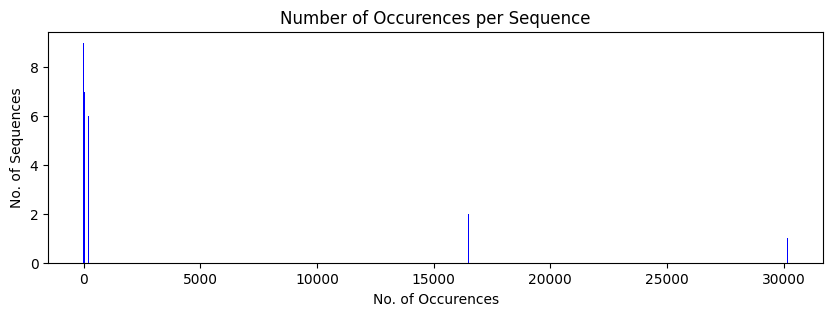

In [ ]:
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(unif_s100_000_occ['size'], unif_s100_000_occ['index'], color ='blue', width=30)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
unif_s100_000_occ = unif_s100_000_occ[['index', 'size']]
unif_s100_000_occ.head()

,index,size
0,1,30166
1,2,16482
2,3,7042
3,4,2579
4,5,785


In [ ]:
print(unif_s100_000_occ.shape)

# saving to file, readable by recon functions
unif_s100_000_occ.to_csv('df_fill_in_unif_100_000.tsv', sep='\t', index=False, header=False)

(9, 2)


### Rarefaction

In [ ]:
unif_s100_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_100_000.tsv', sep='\t', header=None)
unif_s100_000_occ = unif_s100_000_occ.set_axis(['index', 'size'], axis=1)

In [ ]:
size_s100000 = np.repeat(unif_s100_000_occ['index'].values, unif_s100_000_occ['size'].values)
size2_s100000 = np.repeat(np.arange(1, len(size_s100000)+1), size_s100000)
np.random.shuffle(size2_s100000)

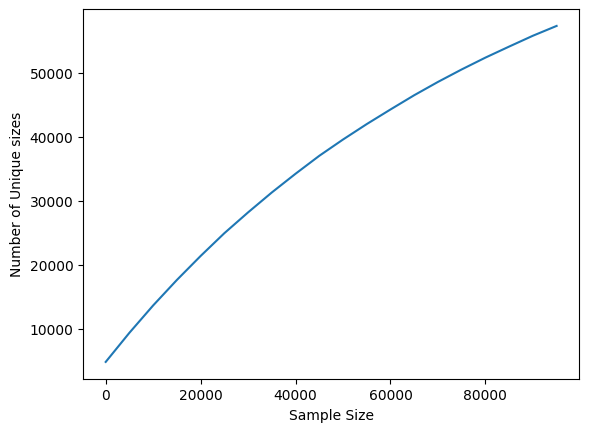

In [ ]:
# calculate the number of unique elements for every 5000 samples
step_size = 5000
num_steps = len(size2_s100000) // step_size
unique_s100_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size2_s100000[:end_index], return_counts=True)
    unique_s100_000[i] = len(counts)

# save to csv
np.savetxt("unique_s100_000.csv", unique_s100_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 5000*(len(unique_s100_000)), 5000), unique_s100_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [ ]:
unif_s100_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_100_000.tsv', sep='\t', header=None)
unif_s100_000_occ = unif_s100_000_occ.set_axis(['index', 'size'], axis=1)
unif_s100_000_occ.head()

,index,size
0,1,30166
1,2,16482
2,3,7042
3,4,2579
4,5,785


In [ ]:
# Shanon's Entropy Index
counts_unif2 = np.repeat(unif_s100_000_occ['index'], unif_s100_000_occ['size'])
shannon(counts_unif2)

15.607944057925218

In [ ]:
# Evenness
pielou_e(counts_unif2)

0.9874619738974884

In [ ]:
# Speices Richness
sum(unif_s100_000_occ['size'])

57295

## Uniform Population: 1,000,000

### Cleaning

In [ ]:
df_unif_s1_000_000 = pd.read_csv('unif_s1_000_000.tsv')
df_unif_s1_000_000.head()

,AASeq,size
0,species76837,1
1,species60499,1
2,species86804,1
3,species79042,1
4,species33664,1


In [ ]:
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
df_unif_s1_000_000 = df_unif_s1_000_000.groupby(df_unif_s1_000_000['AASeq']).aggregate(aggregation_functions)
df_unif_s1_000_000 = df_unif_s1_000_000.reset_index(drop=True)
df_unif_s1_000_000.head()

,AASeq,size
0,species0,8
1,species1,9
2,species10,5
3,species100,6
4,species1000,10


### Clonotype Analysis

In [ ]:
unif_s1_000_000_occ = df_unif_s1_000_000['size'].value_counts().to_frame()
unif_s1_000_000_occ = unif_s1_000_000_occ.reset_index()
unif_s1_000_000_occ.head()

,index,size
0,4,5171
1,6,5149
2,3,5148
3,8,5101
4,5,5067


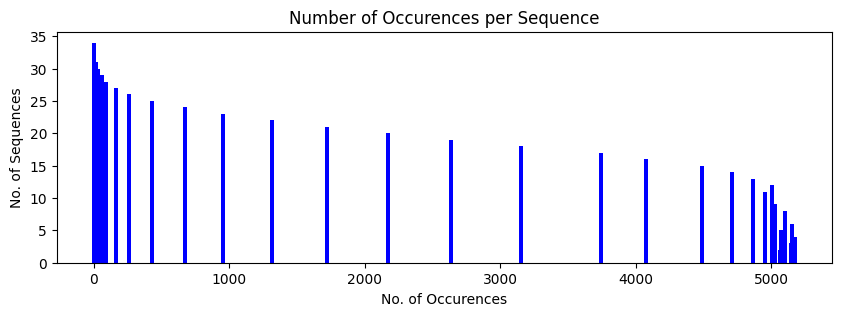

In [ ]:
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(unif_s1_000_000_occ['size'], unif_s1_000_000_occ['index'], color ='blue', width=30)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
unif_s1_000_000_occ = unif_s1_000_000_occ[['index', 'size']]
unif_s1_000_000_occ.head()

,index,size
0,4,5171
1,6,5149
2,3,5148
3,8,5101
4,5,5067


In [ ]:
print(unif_s1_000_000_occ.shape)

# saving to file, readable by recon functions
unif_s1_000_000_occ.to_csv('df_fill_in_unif_1_000_000.tsv', sep='\t', index=False, header=False)

(34, 2)


### Rarefaction

In [ ]:
unif_s1_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_1_000_000.tsv', sep='\t', header=None)
unif_s1_000_000_occ = unif_s1_000_000_occ.set_axis(['index', 'size'], axis=1)

In [ ]:
size_s1000000 = np.repeat(unif_s1_000_000_occ['index'].values, unif_s1_000_000_occ['size'].values)
size2_s1000000 = np.repeat(np.arange(1, len(size_s1000000)+1), size_s1000000)
np.random.shuffle(size2_s1000000)

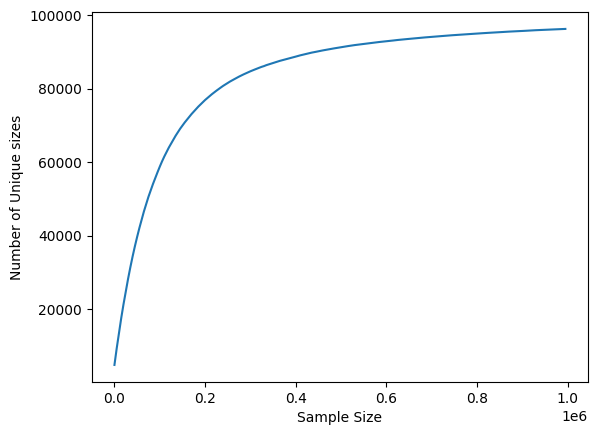

In [ ]:
# calculate the number of unique elements for every 5000 samples
step_size = 5000
num_steps = len(size2_s1000000) // step_size
unique_s1_000_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size2_s1000000[:end_index], return_counts=True)
    unique_s1_000_000[i] = len(counts)

# save to csv
np.savetxt("unique_s1_000_000.csv", unique_s1_000_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 5000*(len(unique_s1_000_000)), 5000), unique_s1_000_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [ ]:
unif_s1_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_1_000_000.tsv', sep='\t', header=None)
unif_s1_000_000_occ = unif_s1_000_000_occ.set_axis(['index', 'size'], axis=1)
unif_s1_000_000_occ.head()

,index,size
0,4,5171
1,6,5149
2,3,5148
3,8,5101
4,5,5067


In [ ]:
# Shanon's Entropy Index
counts_unif3 = np.repeat(unif_s1_000_000_occ['index'], unif_s1_000_000_occ['size'])
shannon(counts_unif3)

16.28315760344319

In [ ]:
# Evenness
pielou_e(counts_unif3)

0.9835433356019547

In [ ]:
# Speices Richness
sum(unif_s1_000_000_occ['size'])

96324

## Uniform Population: 3,000,000

### Cleaning

In [ ]:
df_unif_s3_000_000 = pd.read_csv('unif_s3_000_000.tsv')
df_unif_s3_000_000.head()

,AASeq,size
0,species88622,1
1,species40616,1
2,species87032,1
3,species26381,1
4,species95469,1


In [ ]:
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
df_unif_s3_000_000 = df_unif_s3_000_000.groupby(df_unif_s3_000_000['AASeq']).aggregate(aggregation_functions)
df_unif_s3_000_000 = df_unif_s3_000_000.reset_index(drop=True)
df_unif_s3_000_000.head()

,AASeq,size
0,species0,29
1,species1,19
2,species10,9
3,species100,8
4,species1000,28


### Clonotype Analysis

In [ ]:
unif_s3_000_000_occ = df_unif_s3_000_000['size'].value_counts().to_frame()
unif_s3_000_000_occ = unif_s3_000_000_occ.reset_index()
unif_s3_000_000_occ.head()

,index,size
0,21,1825
1,9,1790
2,35,1787
3,31,1787
4,3,1769


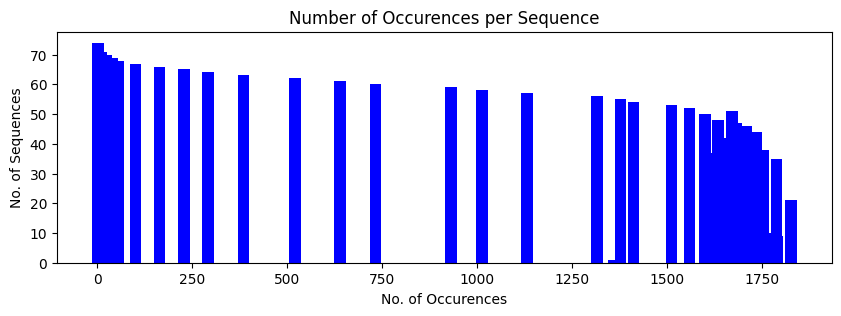

In [ ]:
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(unif_s3_000_000_occ['size'], unif_s3_000_000_occ['index'], color ='blue', width=30)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
unif_s3_000_000_occ = unif_s3_000_000_occ[['index', 'size']]
unif_s3_000_000_occ.head()

,index,size
0,21,1825
1,9,1790
2,35,1787
3,31,1787
4,3,1769


In [ ]:
print(unif_s3_000_000_occ.shape)

# saving to file, readable by recon functions
unif_s3_000_000_occ.to_csv('df_fill_in_unif_3_000_000.tsv', sep='\t', index=False, header=False)

(74, 2)


### Rarefaction

In [ ]:
unif_s3_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_3_000_000.tsv', sep='\t', header=None)
unif_s3_000_000_occ = unif_s3_000_000_occ.set_axis(['index', 'size'], axis=1)

In [ ]:
size_s3000000 = np.repeat(unif_s3_000_000_occ['index'].values, unif_s3_000_000_occ['size'].values)
size2_s3000000 = np.repeat(np.arange(1, len(size_s3000000)+1), size_s3000000)
np.random.shuffle(size2_s3000000)

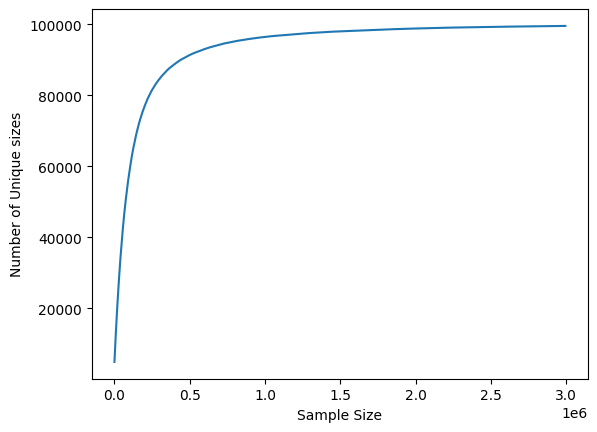

In [ ]:
# calculate the number of unique elements for every 5000 samples
step_size = 5000
num_steps = len(size2_s3000000) // step_size
unique_s3_000_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size2_s3000000[:end_index], return_counts=True)
    unique_s3_000_000[i] = len(counts)

# save to csv
np.savetxt("unique_s3_000_000.csv", unique_s3_000_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 5000*(len(unique_s3_000_000)), 5000), unique_s3_000_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [ ]:
unif_s3_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_3_000_000.tsv', sep='\t', header=None)
unif_s3_000_000_occ = unif_s3_000_000_occ.set_axis(['index', 'size'], axis=1)
unif_s3_000_000_occ.head()

,index,size
0,21,1825
1,9,1790
2,35,1787
3,31,1787
4,3,1769


In [ ]:
# Shanon's Entropy Index
counts_unif4 = np.repeat(unif_s3_000_000_occ['index'], unif_s3_000_000_occ['size'])
shannon(counts_unif4)

16.333490281343465

In [ ]:
# Evenness
pielou_e(counts_unif4)

0.9837680739889652

In [ ]:
# Speices Richness
sum(unif_s3_000_000_occ['size'])

99540

# Uniform Population: Species Richness 1,000,000

## Uniform Population: 10,000

### Cleaning

In [ ]:
unif_pop_df_1 = pd.read_csv('unif_s10_000_1.tsv')
print(unif_pop_df_1.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
unif_pop_df_1 = unif_pop_df_1.groupby(unif_pop_df_1['AASeq']).aggregate(aggregation_functions)
unif_pop_df_1 = unif_pop_df_1.reset_index(drop=True)
unif_pop_df_1.head()

           AASeq  size
0  species311214     1
1  species621207     1
2  species963479     1
3  species101885     1
4  species993462     1


,AASeq,size
0,species100417,1
1,species100562,1
2,species100643,1
3,species100819,1
4,species100879,1


### Clonotype Analysis

   index  size
0      1  9854
1      2    73


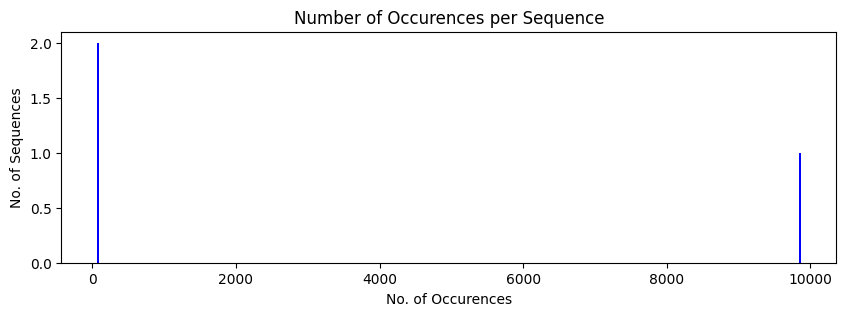

In [ ]:
unif1_s10_000_occ = unif_pop_df_1['size'].value_counts().to_frame()
unif1_s10_000_occ = unif1_s10_000_occ.reset_index()
print(unif1_s10_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(unif1_s10_000_occ['size'], unif1_s10_000_occ['index'], color ='blue', width=30)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [68]:
unif1_s10_000_occ = unif1_s10_000_occ[['index', 'size']]
print(unif1_s10_000_occ.head())

print(unif1_s10_000_occ.shape)

# saving to file, readable by recon functions
unif1_s10_000_occ.to_csv('df_fill_in_unif1_10_000.tsv', sep='\t', index=False, header=False)

   index  size
0      1  9854
1      2    73
(2, 2)


### Rarefaction

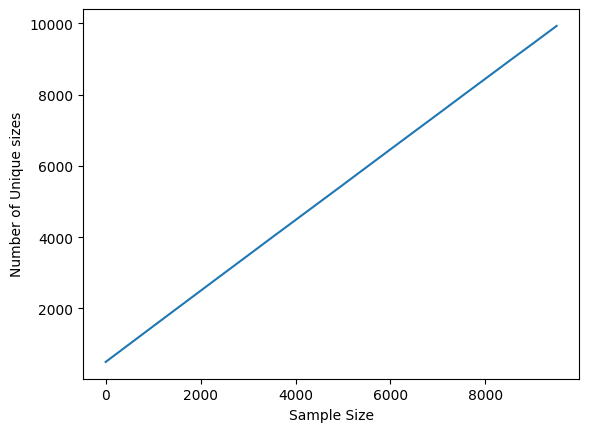

In [ ]:
# unif1_s10_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_3_000_000.tsv', sep='\t', header=None)
unif1_s10_000_occ = unif1_s10_000_occ.set_axis(['index', 'size'], axis=1)

size1_s100000 = np.repeat(unif1_s10_000_occ['index'].values, unif1_s10_000_occ['size'].values)
size12_s100000 = np.repeat(np.arange(1, len(size1_s100000)+1), size1_s100000)
np.random.shuffle(size12_s100000)

# calculate the number of unique elements for every 500 samples
step_size = 500
num_steps = len(size12_s100000) // step_size
unique1_s10_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_s100000[:end_index], return_counts=True)
    unique1_s10_000[i] = len(counts)

# save to csv
np.savetxt("unique1_s10_000.csv", unique1_s10_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 500*(len(unique1_s10_000)), 500), unique1_s10_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [67]:
# unif1_s10_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_10_000.tsv', sep='\t', header=None)
unif1_s10_000_occ = unif1_s10_000_occ.set_axis(['index', 'size'], axis=1)
print(unif1_s10_000_occ.head())

# Shanon's Entropy Index
counts_unif1_1 = np.repeat(unif1_s10_000_occ['index'], unif1_s10_000_occ['size'])
print('Shannon: ', shannon(counts_unif1_1))

# Evenness
print('Evenness: ', pielou_e(counts_unif1_1))

# Speices Richness
print('Species Richness: ', sum(unif1_s10_000_occ['size']))

   index  size
0      1  9854
1      2    73
Shannon:  13.273112379549445
Evenness:  0.9996964936082728
Species Richness:  9927


## Uniform Population: 100,000

### Cleaning

In [ ]:
unif_pop_df_2 = pd.read_csv('unif_s100_000_1.tsv')
print(unif_pop_df_2.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
unif_pop_df_2 = unif_pop_df_2.groupby(unif_pop_df_2['AASeq']).aggregate(aggregation_functions)
unif_pop_df_2 = unif_pop_df_2.reset_index(drop=True)
unif_pop_df_2.head()

           AASeq  size
0  species186574     1
1  species699274     1
2  species678898     1
3  species998821     1
4  species122740     1


,AASeq,size
0,species1,1
1,species100011,1
2,species100019,1
3,species10002,1
4,species100021,2


### Clonotype Analysis

   index   size
0      1  87837
1      2   5637
2      3    275
3      4     16


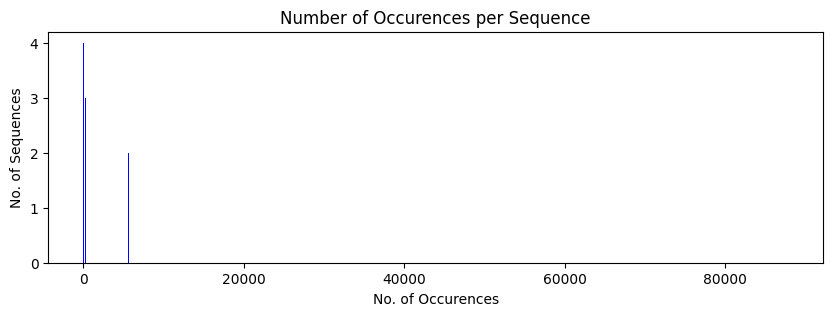

In [ ]:
unif1_s100_000_occ = unif_pop_df_2['size'].value_counts().to_frame()
unif1_s100_000_occ = unif1_s100_000_occ.reset_index()
print(unif1_s100_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(unif1_s100_000_occ['size'], unif1_s100_000_occ['index'], color ='blue', width=30)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
unif1_s100_000_occ = unif1_s100_000_occ[['index', 'size']]
print(unif1_s100_000_occ.head())

print(unif1_s100_000_occ.shape)

# saving to file, readable by recon functions
unif1_s100_000_occ.to_csv('df_fill_in_unif1_100_000.tsv', sep='\t', index=False, header=False)

   index   size
0      1  87837
1      2   5637
2      3    275
3      4     16
(4, 2)


### Rarefaction

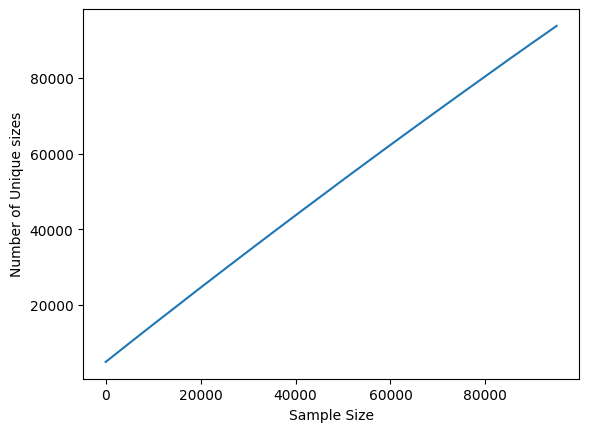

In [ ]:
# unif1_s100_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_100_000.tsv', sep='\t', header=None)
unif1_s100_000_occ = unif1_s100_000_occ.set_axis(['index', 'size'], axis=1)

size1_s1000000 = np.repeat(unif1_s100_000_occ['index'].values, unif1_s100_000_occ['size'].values)
size12_s1000000 = np.repeat(np.arange(1, len(size1_s1000000)+1), size1_s1000000)
np.random.shuffle(size12_s1000000)

# calculate the number of unique elements for every 5000 samples
step_size = 5000
num_steps = len(size12_s1000000) // step_size
unique1_s100_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_s1000000[:end_index], return_counts=True)
    unique1_s100_000[i] = len(counts)

# save to csv
np.savetxt("unique1_s100_000.csv", unique1_s100_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 5000*(len(unique1_s100_000)), 5000), unique1_s100_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [51]:
# unif1_s100_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_100_000.tsv', sep='\t', header=None)
unif1_s100_000_occ = unif1_s100_000_occ.set_axis(['index', 'size'], axis=1)
print(unif1_s100_000_occ.head())

# Shanon's Entropy Index
counts_unif1_2 = np.repeat(unif1_s100_000_occ['index'], unif1_s100_000_occ['size'])
print('Shannon: ', shannon(counts_unif1_2))

# Evenness
print('Evenness: ', pielou_e(counts_unif1_2))

# Speices Richness
print('Species Richness: ', sum(unif1_s100_000_occ['size']))

   index   size
0      1  87837
1      2   5637
2      3    275
3      4     16
Shannon:  16.482544533805857
Evenness:  0.9979283258289782
Species Richness:  93765


## Uniform Population: 1,000,000

### Cleaning

In [ ]:
unif_pop_df_3 = pd.read_csv('unif_s1_000_000_1.tsv')
print(unif_pop_df_3.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
unif_pop_df_3 = unif_pop_df_3.groupby(unif_pop_df_3['AASeq']).aggregate(aggregation_functions)
unif_pop_df_3 = unif_pop_df_3.reset_index(drop=True)
unif_pop_df_3.head()

           AASeq  size
0  species420324     1
1  species483409     1
2  species410617     1
3  species842020     1
4  species136550     1


,AASeq,size
0,species1,4
1,species100,1
2,species1000,1
3,species10000,1
4,species100001,3


### Clonotype Analysis

   index    size
0      1  303125
1      2  163447
2      3   71206
3      4   25478
4      5    7633


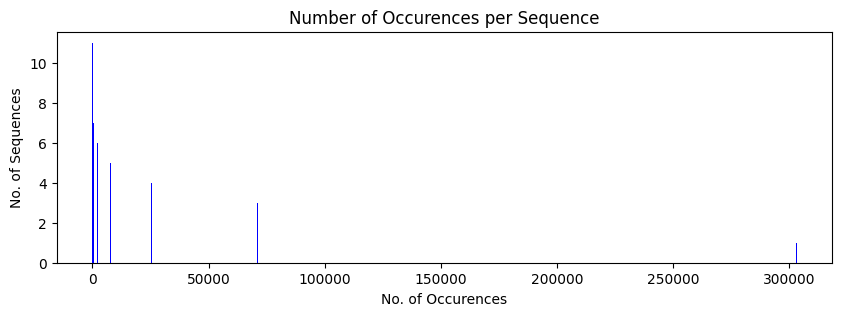

In [ ]:
unif1_s1_000_000_occ = unif_pop_df_3['size'].value_counts().to_frame()
unif1_s1_000_000_occ = unif1_s1_000_000_occ.reset_index()
print(unif1_s1_000_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(unif1_s1_000_000_occ['size'], unif1_s1_000_000_occ['index'], color ='blue', width=300)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
unif1_s1_000_000_occ = unif1_s1_000_000_occ[['index', 'size']]
print(unif1_s1_000_000_occ.head())

print(unif1_s1_000_000_occ.shape)

# saving to file, readable by recon functions
unif1_s1_000_000_occ.to_csv('df_fill_in_unif1_1_000_000.tsv', sep='\t', index=False, header=False)

   index    size
0      1  303125
1      2  163447
2      3   71206
3      4   25478
4      5    7633
(11, 2)


### Rarefaction

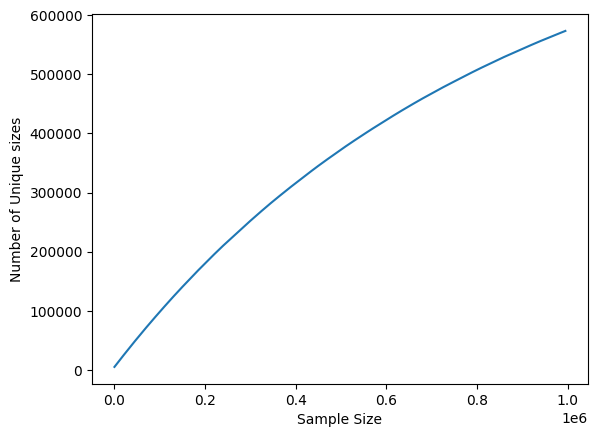

In [ ]:
# unif1_s1_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_1_000_000.tsv', sep='\t', header=None)
unif1_s1_000_000_occ = unif1_s1_000_000_occ.set_axis(['index', 'size'], axis=1)

size1_s10000000 = np.repeat(unif1_s1_000_000_occ['index'].values, unif1_s1_000_000_occ['size'].values)
size12_s10000000 = np.repeat(np.arange(1, len(size1_s10000000)+1), size1_s10000000)
np.random.shuffle(size12_s10000000)

# calculate the number of unique elements for every 5000 samples
step_size = 5000
num_steps = len(size12_s10000000) // step_size
unique1_s1_000_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_s10000000[:end_index], return_counts=True)
    unique1_s1_000_000[i] = len(counts)

# save to csv
np.savetxt("unique1_s1_000_000.csv", unique1_s1_000_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 5000*(len(unique1_s1_000_000)), 5000), unique1_s1_000_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [52]:
# unif1_s1_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_1_000_000.tsv', sep='\t', header=None)
unif1_s1_000_000_occ = unif1_s1_000_000_occ.set_axis(['index', 'size'], axis=1)
print(unif1_s1_000_000_occ.head())

# Shanon's Entropy Index
counts_unif1_3 = np.repeat(unif1_s1_000_000_occ['index'], unif1_s1_000_000_occ['size'])
print('Shannon: ', shannon(counts_unif1_3))

# Evenness
print('Evenness: ', pielou_e(counts_unif1_3))

# Speices Richness
print('Species Richness: ', sum(unif1_s1_000_000_occ['size']))

   index    size
0      1  303125
1      2  163447
2      3   71206
3      4   25478
4      5    7633
Shannon:  18.93041819353295
Evenness:  0.9895983108750984
Species Richness:  573485


## Uniform Population: 3,000,000

### Cleaning

In [ ]:
unif_pop_df_4 = pd.read_csv('unif_s3_000_000_1.tsv')
print(unif_pop_df_4.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
unif_pop_df_4 = unif_pop_df_4.groupby(unif_pop_df_4['AASeq']).aggregate(aggregation_functions)
unif_pop_df_4 = unif_pop_df_4.reset_index(drop=True)
unif_pop_df_4.head()

           AASeq  size
0  species130909     1
1  species205686     1
2  species698252     1
3  species270164     1
4  species745448     1


,AASeq,size
0,species0,1
1,species1,2
2,species100,5
3,species1000,7
4,species10000,9


### Clonotype Analysis

   index    size
0      1  167111
1      2  159857
2      3  145383
3      4  122281
4      5   94238


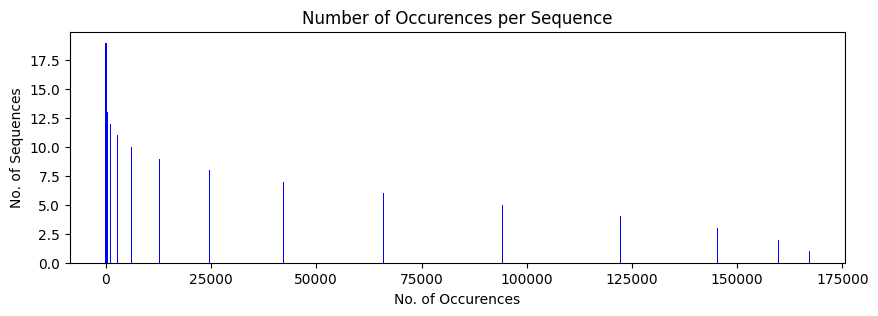

In [ ]:
unif1_s3_000_000_occ = unif_pop_df_4['size'].value_counts().to_frame()
unif1_s3_000_000_occ = unif1_s3_000_000_occ.reset_index()
print(unif1_s3_000_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(unif1_s3_000_000_occ['size'], unif1_s3_000_000_occ['index'], color ='blue', width=300)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
unif1_s3_000_000_occ = unif1_s3_000_000_occ[['index', 'size']]
print(unif1_s3_000_000_occ.head())

print(unif1_s3_000_000_occ.shape)

# saving to file, readable by recon functions
unif1_s3_000_000_occ.to_csv('df_fill_in_unif1_3_000_000.tsv', sep='\t', index=False, header=False)

   index    size
0      1  167111
1      2  159857
2      3  145383
3      4  122281
4      5   94238
(19, 2)


### Rarefaction

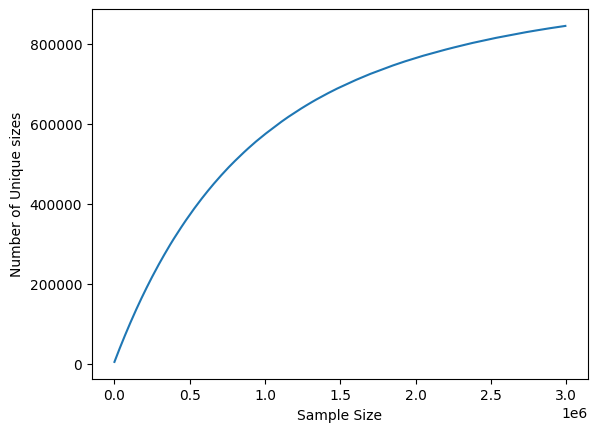

In [ ]:
# unif1_s3_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_3_000_000.tsv', sep='\t', header=None)
unif1_s3_000_000_occ = unif1_s3_000_000_occ.set_axis(['index', 'size'], axis=1)

size1_s30000000 = np.repeat(unif1_s3_000_000_occ['index'].values, unif1_s3_000_000_occ['size'].values)
size12_s30000000 = np.repeat(np.arange(1, len(size1_s30000000)+1), size1_s30000000)
np.random.shuffle(size12_s30000000)

# calculate the number of unique elements for every 5000 samples
step_size = 5000
num_steps = len(size12_s30000000) // step_size
unique1_s3_000_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_s30000000[:end_index], return_counts=True)
    unique1_s3_000_000[i] = len(counts)

# save to csv
np.savetxt("unique1_s3_000_000.csv", unique1_s3_000_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 5000*(len(unique1_s3_000_000)), 5000), unique1_s3_000_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [61]:
# unif1_s3_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_3_000_000.tsv', sep='\t', header=None)
unif1_s3_000_000_occ = unif1_s3_000_000_occ.set_axis(['index', 'size'], axis=1)
print(unif1_s3_000_000_occ.head())

# Shanon's Entropy Index
counts_unif1_4 = np.repeat(unif1_s3_000_000_occ['index'], unif1_s3_000_000_occ['size'])
print('Shannon: ', shannon(counts_unif1_4))

# Evenness
print('Evenness: ', pielou_e(counts_unif1_4))

# Speices Richness
print('Species Richness: ', sum(unif1_s3_000_000_occ['size']))

   index    size
0      1  167111
1      2  159857
2      3  145383
3      4  122281
4      5   94238
Shannon:  19.423153637289595
Evenness:  0.9865142384469561
Species Richness:  845046


## Uniform Population: 10,000,000

### Cleaning

In [ ]:
unif_pop_df_5 = pd.read_csv('unif_s10_000_000_1.tsv')
print(unif_pop_df_5.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
unif_pop_df_5 = unif_pop_df_5.groupby(unif_pop_df_5['AASeq']).aggregate(aggregation_functions)
unif_pop_df_5 = unif_pop_df_5.reset_index(drop=True)
unif_pop_df_5.head()

           AASeq  size
0  species500009     1
1  species776107     1
2  species671889     1
3  species158816     1
4  species136716     1


,AASeq,size
0,species0,4
1,species1,16
2,species100,4
3,species1000,9
4,species10000,13


### Clonotype Analysis

   index   size
0      4  51309
1      3  51070
2      9  50994
3      6  50963
4      8  50856


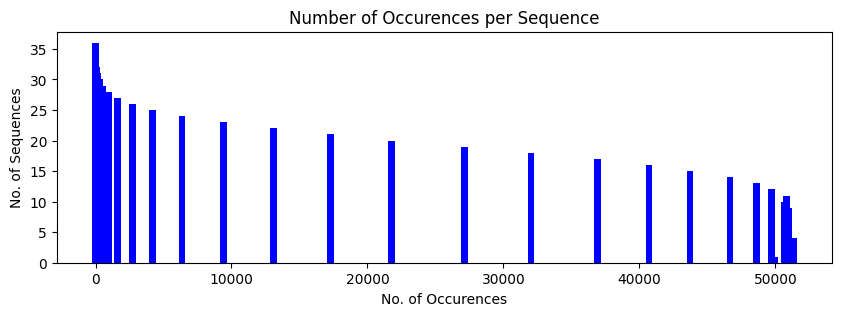

In [ ]:
unif1_s10_000_000_occ = unif_pop_df_5['size'].value_counts().to_frame()
unif1_s10_000_000_occ = unif1_s10_000_000_occ.reset_index()
print(unif1_s10_000_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(unif1_s10_000_000_occ['size'], unif1_s10_000_000_occ['index'], color ='blue', width=500)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
unif1_s10_000_000_occ = unif1_s10_000_000_occ[['index', 'size']]
print(unif1_s10_000_000_occ.head())

print(unif1_s10_000_000_occ.shape)

# saving to file, readable by recon functions
unif1_s10_000_000_occ.to_csv('df_fill_in_unif1_10_000_000.tsv', sep='\t', index=False, header=False)

   index   size
0      4  51309
1      3  51070
2      9  50994
3      6  50963
4      8  50856
(36, 2)


### Rarefaction

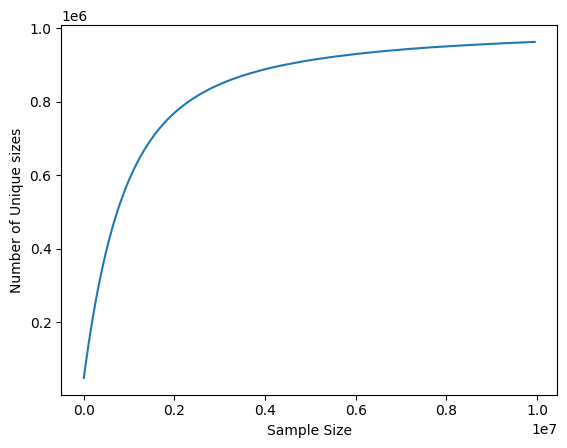

In [ ]:
# unif1_s10_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_10_000_000.tsv', sep='\t', header=None)
unif1_s10_000_000_occ = unif1_s10_000_000_occ.set_axis(['index', 'size'], axis=1)

size1_s100000000 = np.repeat(unif1_s10_000_000_occ['index'].values, unif1_s10_000_000_occ['size'].values)
size12_s100000000 = np.repeat(np.arange(1, len(size1_s100000000)+1), size1_s100000000)
np.random.shuffle(size12_s100000000)

# calculate the number of unique elements for every 50000 samples
step_size = 50000
num_steps = len(size12_s100000000) // step_size
unique1_s10_000_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_s100000000[:end_index], return_counts=True)
    unique1_s10_000_000[i] = len(counts)

# save to csv
np.savetxt("unique1_s10_000_000.csv", unique1_s10_000_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 50000*(len(unique1_s10_000_000)), 50000), unique1_s10_000_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [60]:
# unif1_s10_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_10_000_000.tsv', sep='\t', header=None)
unif1_s10_000_000_occ = unif1_s10_000_000_occ.set_axis(['index', 'size'], axis=1)
print(unif1_s10_000_000_occ.head())

# Shanon's Entropy Index
counts_unif1_5 = np.repeat(unif1_s10_000_000_occ['index'], unif1_s10_000_000_occ['size'])
print('Shannon: ', shannon(counts_unif1_5))

# Evenness
print('Evenness: ', pielou_e(counts_unif1_5))

# Speices Richness
print('Species Richness: ', sum(unif1_s10_000_000_occ['size']))

   index   size
0      4  51309
1      3  51070
2      9  50994
3      6  50963
4      8  50856
Shannon:  19.605700673625574
Evenness:  0.9863596694240482
Species Richness:  962767


## Uniform Population: 20,000,000

### Cleaning

In [ ]:
unif_pop_df_6 = pd.read_csv('unif_s20_000_000_1.tsv')
print(unif_pop_df_6.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
unif_pop_df_6 = unif_pop_df_6.groupby(unif_pop_df_6['AASeq']).aggregate(aggregation_functions)
unif_pop_df_6 = unif_pop_df_6.reset_index(drop=True)
unif_pop_df_6.head()

           AASeq  size
0  species283124     1
1  species946963     1
2  species835855     1
3  species617756     1
4  species188201     1


,AASeq,size
0,species0,8
1,species1,46
2,species10,2
3,species100,19
4,species1000,20


### Clonotype Analysis

   index   size
0     19  25914
1     21  25800
2     10  25701
3      2  25669
4     27  25661


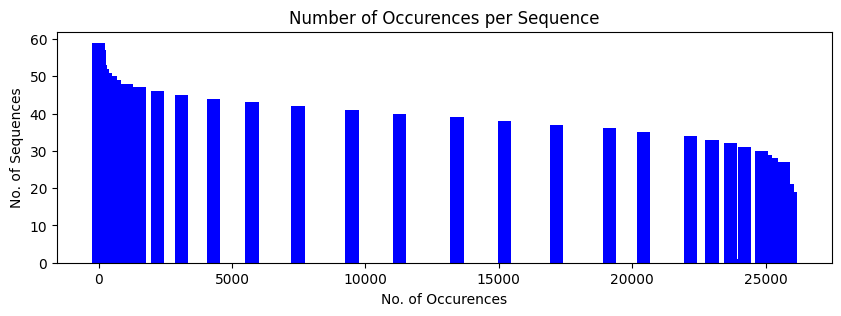

In [ ]:
unif1_s20_000_000_occ = unif_pop_df_6['size'].value_counts().to_frame()
unif1_s20_000_000_occ = unif1_s20_000_000_occ.reset_index()
print(unif1_s20_000_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(unif1_s20_000_000_occ['size'], unif1_s20_000_000_occ['index'], color ='blue', width=500)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
unif1_s20_000_000_occ = unif1_s20_000_000_occ[['index', 'size']]
print(unif1_s20_000_000_occ.head())

print(unif1_s20_000_000_occ.shape)

# saving to file, readable by recon functions
unif1_s20_000_000_occ.to_csv('df_fill_in_unif1_20_000_000.tsv', sep='\t', index=False, header=False)

   index   size
0     19  25914
1     21  25800
2     10  25701
3      2  25669
4     27  25661
(59, 2)


### Rarefaction

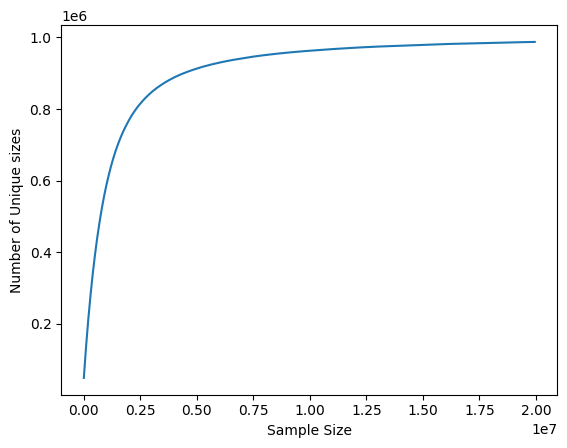

In [ ]:
# unif1_s20_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_20_000_000.tsv', sep='\t', header=None)
unif1_s20_000_000_occ = unif1_s20_000_000_occ.set_axis(['index', 'size'], axis=1)

size1_s200000000 = np.repeat(unif1_s20_000_000_occ['index'].values, unif1_s20_000_000_occ['size'].values)
size12_s200000000 = np.repeat(np.arange(1, len(size1_s200000000)+1), size1_s200000000)
np.random.shuffle(size12_s200000000)

# calculate the number of unique elements for every 50000 samples
step_size = 50000
num_steps = len(size12_s200000000) // step_size
unique1_s20_000_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_s200000000[:end_index], return_counts=True)
    unique1_s20_000_000[i] = len(counts)

# save to csv
np.savetxt("unique1_s20_000_000.csv", unique1_s20_000_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 50000*(len(unique1_s20_000_000)), 50000), unique1_s20_000_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [59]:
# unif1_s20_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_20_000_000.tsv', sep='\t', header=None)
unif1_s20_000_000_occ = unif1_s20_000_000_occ.set_axis(['index', 'size'], axis=1)
print(unif1_s20_000_000_occ.head())

# Shanon's Entropy Index
counts_unif1_6 = np.repeat(unif1_s20_000_000_occ['index'], unif1_s20_000_000_occ['size'])
print('Shannon: ', shannon(counts_unif1_6))

# Evenness
print('Evenness: ', pielou_e(counts_unif1_6))

# Speices Richness
print('Species Richness: ', sum(unif1_s20_000_000_occ['size']))

   index   size
0     19  25914
1     21  25800
2     10  25701
3      2  25669
4     27  25661
Shannon:  19.64342366028198
Evenness:  0.9864363619081343
Species Richness:  987570


## Uniform Population: 30,000,000

### Cleaning

In [ ]:
unif_pop_df_7 = pd.read_csv('unif_s30_000_000_1.tsv')
print(unif_pop_df_7.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
unif_pop_df_7 = unif_pop_df_7.groupby(unif_pop_df_7['AASeq']).aggregate(aggregation_functions)
unif_pop_df_7 = unif_pop_df_7.reset_index(drop=True)
unif_pop_df_7.head()

           AASeq  size
0  species984321     1
1  species799475     1
2   species65116     1
3  species714391     1
4  species668980     1


,AASeq,size
0,species0,9
1,species1,59
2,species100,25
3,species1000,29
4,species10000,41


### Clonotype Analysis

   index   size
0     34  17323
1     18  17314
2     41  17280
3     28  17208
4     32  17185


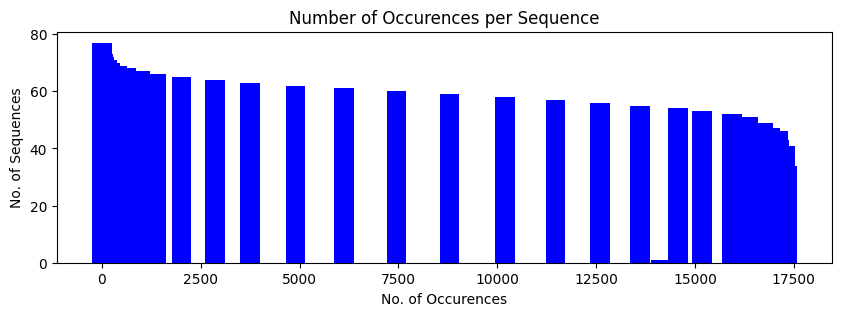

In [ ]:
unif1_s30_000_000_occ = unif_pop_df_7['size'].value_counts().to_frame()
unif1_s30_000_000_occ = unif1_s30_000_000_occ.reset_index()
print(unif1_s30_000_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(unif1_s30_000_000_occ['size'], unif1_s30_000_000_occ['index'], color ='blue', width=500)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
unif1_s30_000_000_occ = unif1_s30_000_000_occ[['index', 'size']]
print(unif1_s30_000_000_occ.head())

print(unif1_s30_000_000_occ.shape)

# saving to file, readable by recon functions
unif1_s30_000_000_occ.to_csv('df_fill_in_unif1_30_000_000.tsv', sep='\t', index=False, header=False)

   index   size
0     34  17323
1     18  17314
2     41  17280
3     28  17208
4     32  17185
(77, 2)


### Rarefaction

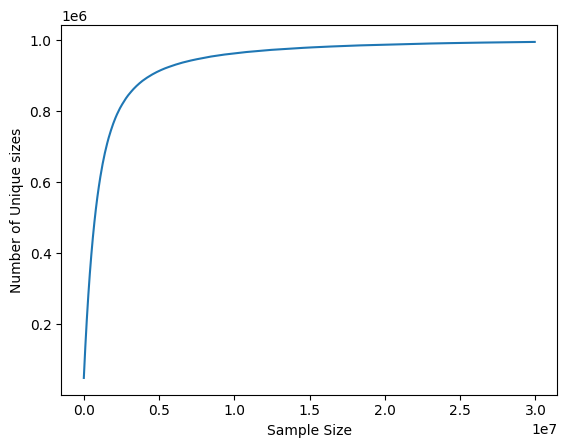

In [ ]:
# unif1_s30_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_30_000_000.tsv', sep='\t', header=None)
unif1_s30_000_000_occ = unif1_s30_000_000_occ.set_axis(['index', 'size'], axis=1)

size1_s300000000 = np.repeat(unif1_s30_000_000_occ['index'].values, unif1_s30_000_000_occ['size'].values)
size12_s300000000 = np.repeat(np.arange(1, len(size1_s300000000)+1), size1_s300000000)
np.random.shuffle(size12_s300000000)

# calculate the number of unique elements for every 50000 samples
step_size = 50000
num_steps = len(size12_s300000000) // step_size
unique1_s30_000_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_s300000000[:end_index], return_counts=True)
    unique1_s30_000_000[i] = len(counts)

# save to csv
np.savetxt("unique1_s30_000_000.csv", unique1_s30_000_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 50000*(len(unique1_s30_000_000)), 50000), unique1_s30_000_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [58]:
# unif1_s30_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_30_000_000.tsv', sep='\t', header=None)
unif1_s30_000_000_occ = unif1_s30_000_000_occ.set_axis(['index', 'size'], axis=1)
print(unif1_s30_000_000_occ.head())

# Shanon's Entropy Index
counts_unif1_7 = np.repeat(unif1_s30_000_000_occ['index'], unif1_s30_000_000_occ['size'])
print('Shannon: ', shannon(counts_unif1_7))

# Evenness
print('Evenness: ', pielou_e(counts_unif1_7))

# Speices Richness
print('Species Richness: ', sum(unif1_s30_000_000_occ['size']))

   index   size
0     34  17323
1     18  17314
2     41  17280
3     28  17208
4     32  17185
Shannon:  19.655910142260517
Evenness:  0.9865297713429477
Species Richness:  994971


## Uniform Population: 40,000,000

### Cleaning

In [ ]:
unif_pop_df_8 = pd.read_csv('unif_s40_000_000_1.tsv')
print(unif_pop_df_8.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
unif_pop_df_8 = unif_pop_df_8.groupby(unif_pop_df_8['AASeq']).aggregate(aggregation_functions)
unif_pop_df_8 = unif_pop_df_8.reset_index(drop=True)
unif_pop_df_8.head()

           AASeq  size
0  species185951     1
1   species58510     1
2  species597088     1
3  species711734     1
4   species91808     1


,AASeq,size
0,species0,12
1,species1,77
2,species10,3
3,species100,29
4,species1000,33


### Clonotype Analysis

   index   size
0     58  13006
1      9  12974
2     48  12964
3     18  12947
4     55  12930


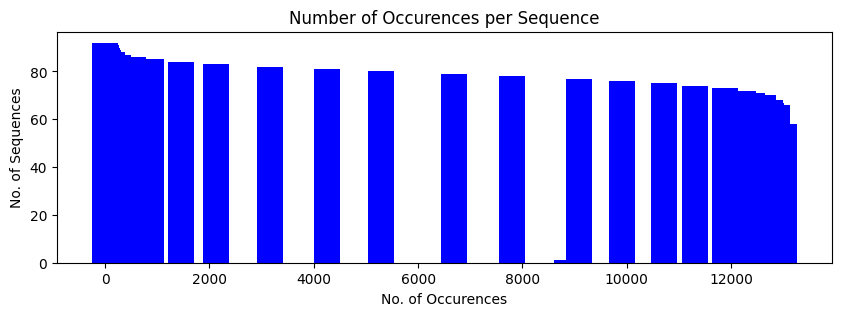

In [ ]:
unif1_s40_000_000_occ = unif_pop_df_8['size'].value_counts().to_frame()
unif1_s40_000_000_occ = unif1_s40_000_000_occ.reset_index()
print(unif1_s40_000_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(unif1_s40_000_000_occ['size'], unif1_s40_000_000_occ['index'], color ='blue', width=500)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
unif1_s40_000_000_occ = unif1_s40_000_000_occ[['index', 'size']]
print(unif1_s40_000_000_occ.head())

print(unif1_s40_000_000_occ.shape)

# saving to file, readable by recon functions
unif1_s40_000_000_occ.to_csv('df_fill_in_unif1_40_000_000.tsv', sep='\t', index=False, header=False)

   index   size
0     58  13006
1      9  12974
2     48  12964
3     18  12947
4     55  12930
(92, 2)


### Rarefaction

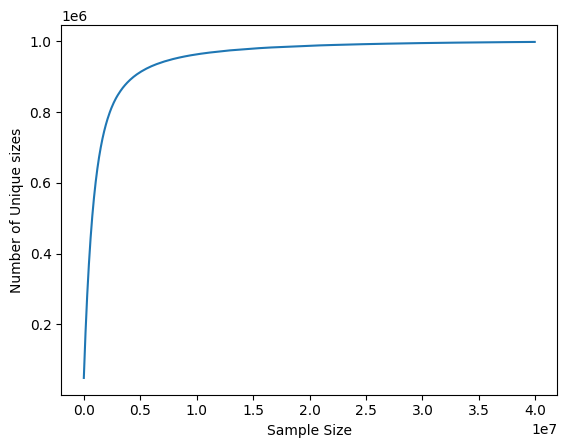

In [ ]:
# unif1_s40_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_40_000_000.tsv', sep='\t', header=None)
unif1_s40_000_000_occ = unif1_s40_000_000_occ.set_axis(['index', 'size'], axis=1)

size1_s400000000 = np.repeat(unif1_s40_000_000_occ['index'].values, unif1_s40_000_000_occ['size'].values)
size12_s400000000 = np.repeat(np.arange(1, len(size1_s400000000)+1), size1_s400000000)
np.random.shuffle(size12_s400000000)

# calculate the number of unique elements for every 50000 samples
step_size = 50000
num_steps = len(size12_s400000000) // step_size
unique1_s40_000_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_s400000000[:end_index], return_counts=True)
    unique1_s40_000_000[i] = len(counts)

# save to csv
np.savetxt("unique1_s40_000_000.csv", unique1_s40_000_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 50000*(len(unique1_s40_000_000)), 50000), unique1_s40_000_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [57]:
# unif1_s40_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_40_000_000.tsv', sep='\t', header=None)
unif1_s40_000_000_occ = unif1_s40_000_000_occ.set_axis(['index', 'size'], axis=1)
print(unif1_s40_000_000_occ.head())

# Shanon's Entropy Index
counts_unif1_8 = np.repeat(unif1_s40_000_000_occ['index'], unif1_s40_000_000_occ['size'])
print('Shannon: ', shannon(counts_unif1_8))

# Evenness
print('Evenness: ', pielou_e(counts_unif1_8))

# Speices Richness
print('Species Richness: ', sum(unif1_s40_000_000_occ['size']))

   index   size
0     58  13006
1      9  12974
2     48  12964
3     18  12947
4     55  12930
Shannon:  19.6621609503868
Evenness:  0.9866005836323528
Species Richness:  998360


# Mixed Poisson Population: Species Richness 100,000

## Mixed Poisson Population: 10,000

### Cleaning

In [ ]:
df_mp_10000 = pd.read_csv('mp_10000.tsv')
df_mp_10000.head()

,AASeq,size
0,species36958,1
1,species14851,1
2,species69997,1
3,species51576,1
4,species97423,1


In [ ]:
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
df_mp_10000 = df_mp_10000.groupby(df_mp_10000['AASeq']).aggregate(aggregation_functions)
df_mp_10000 = df_mp_10000.reset_index(drop=True)
df_mp_10000.head()

,AASeq,size
0,species1,1
1,species10014,1
2,species1002,1
3,species10026,2
4,species10043,1


### Clonotype Analysis

In [ ]:
mp_10000_occ = df_mp_10000['size'].value_counts().to_frame()
mp_10000_occ = mp_10000_occ.reset_index()
mp_10000_occ.head()

,index,size
0,1,9141
1,2,410
2,3,13


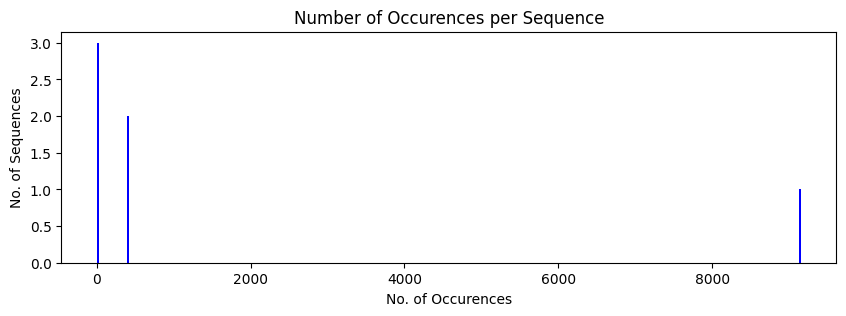

In [ ]:
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(mp_10000_occ['size'], mp_10000_occ['index'], color ='blue', width=30)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
mp_10000_occ = mp_10000_occ[['index', 'size']]
mp_10000_occ.head()

,index,size
0,1,9141
1,2,410
2,3,13


In [ ]:
print(mp_10000_occ.shape)

# saving to file, readable by recon functions
mp_10000_occ.to_csv('df_fill_in_mp_10000.tsv', sep='\t', index=False, header=False)

(3, 2)


### Rarefaction

In [ ]:
mp_10000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp_10000.tsv', sep='\t', header=None)
mp_10000_occ = mp_10000_occ.set_axis(['index', 'size'], axis=1)
mp_10000_occ.head()

,index,size
0,1,9141
1,2,410
2,3,13


In [ ]:
size_mp10000 = np.repeat(mp_10000_occ['index'].values, mp_10000_occ['size'].values)
size2_mp10000 = np.repeat(np.arange(1, len(size_mp10000)+1), size_mp10000)
np.random.shuffle(size2_mp10000)

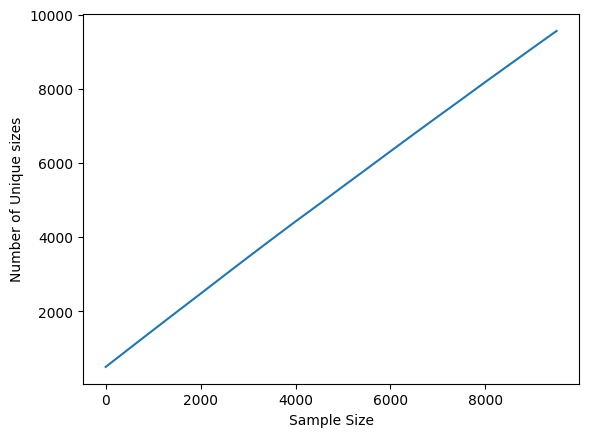

In [ ]:
# calculate the number of unique elements for every 5000 samples
step_size = 500
num_steps = len(size2_mp10000) // step_size
unique_mp10_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size2_mp10000[:end_index], return_counts=True)
    unique_mp10_000[i] = len(counts)

# save to csv
np.savetxt("unique_mp10_000.csv", unique_mp10_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 500*(len(unique_mp10_000)), 500), unique_mp10_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [ ]:
mp_10000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp_10000.tsv', sep='\t', header=None)
mp_10000_occ = mp_10000_occ.set_axis(['index', 'size'], axis=1)
mp_10000_occ.head()

,index,size
0,1,9141
1,2,410
2,3,13


In [ ]:
# Shanon's Entropy Index
counts_mp1 = np.repeat(mp_10000_occ['index'], mp_10000_occ['size'])
shannon(counts_mp1)

13.199531025796635

In [ ]:
# Evenness
pielou_e(counts_mp1)

0.998195063918785

In [ ]:
# Speices Richness
sum(mp_10000_occ['size'])

9564

## Mixed Poisson Population: 100,000

### Cleaning

In [ ]:
df_mp_100000 = pd.read_csv('mp_100000.tsv')
df_mp_100000.head()

,AASeq,size
0,species12447,1
1,species21074,1
2,species47559,1
3,species76659,1
4,species2406,1


In [ ]:
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
df_mp_100000 = df_mp_100000.groupby(df_mp_100000['AASeq']).aggregate(aggregation_functions)
df_mp_100000 = df_mp_100000.reset_index(drop=True)
df_mp_100000.head()

,AASeq,size
0,species0,1
1,species1,1
2,species10,2
3,species100,3
4,species10000,1


### Clonotype Analysis

In [ ]:
mp_100000_occ = df_mp_100000['size'].value_counts().to_frame()
mp_100000_occ = mp_100000_occ.reset_index()
mp_100000_occ.head()

,index,size
0,1,39731
1,2,19671
2,3,5427
3,4,966
4,5,143


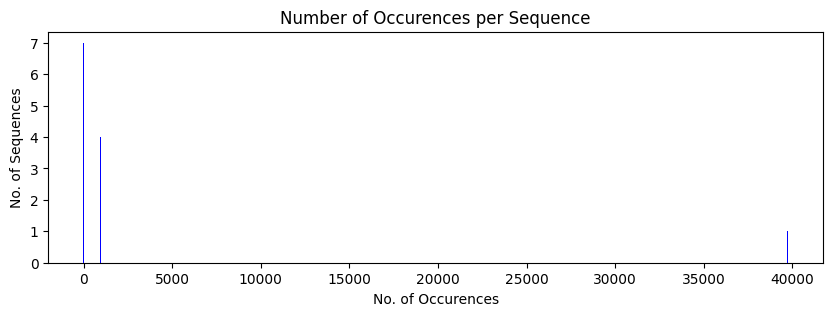

In [ ]:
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(mp_100000_occ['size'], mp_100000_occ['index'], color ='blue', width=30)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
mp_100000_occ = mp_100000_occ[['index', 'size']]
mp_100000_occ.head()

,index,size
0,1,39731
1,2,19671
2,3,5427
3,4,966
4,5,143


In [ ]:
print(mp_100000_occ.shape)

# saving to file, readable by recon functions
mp_100000_occ.to_csv('df_fill_in_mp_100000.tsv', sep='\t', index=False, header=False)

(7, 2)


### Rarefaction

In [ ]:
mp_100000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp_100000.tsv', sep='\t', header=None)
mp_100000_occ = mp_100000_occ.set_axis(['index', 'size'], axis=1)
mp_100000_occ.head()

,index,size
0,1,39731
1,2,19671
2,3,5427
3,4,966
4,5,143


In [ ]:
size_mp100000 = np.repeat(mp_100000_occ['index'].values, mp_100000_occ['size'].values)
size2_mp100000 = np.repeat(np.arange(1, len(size_mp100000)+1), size_mp100000)
np.random.shuffle(size2_mp100000)

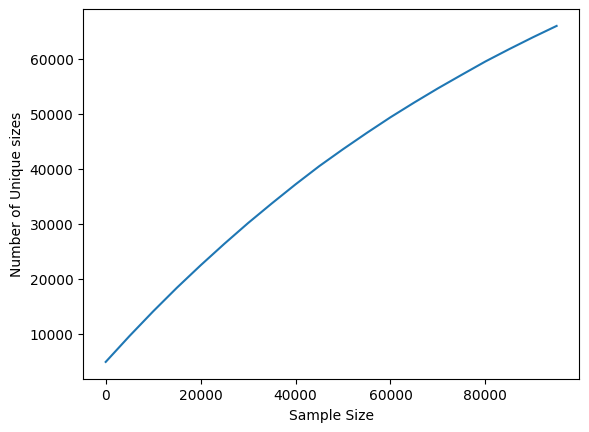

In [ ]:
# calculate the number of unique elements for every 5000 samples
step_size = 5000
num_steps = len(size2_mp100000) // step_size
unique_mp100_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size2_mp100000[:end_index], return_counts=True)
    unique_mp100_000[i] = len(counts)

# save to csv
np.savetxt("unique_mp100_000.csv", unique_mp100_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 5000*(len(unique_mp100_000)), 5000), unique_mp100_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [ ]:
mp_100000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp_100000.tsv', sep='\t', header=None)
mp_100000_occ = mp_100000_occ.set_axis(['index', 'size'], axis=1)
mp_100000_occ.head()

,index,size
0,1,39731
1,2,19671
2,3,5427
3,4,966
4,5,143


In [ ]:
# Shanon's Entropy Index
counts_mp2 = np.repeat(mp_100000_occ['index'], mp_100000_occ['size'])
shannon(counts_mp2)

15.862543451470982

In [ ]:
# Evenness
pielou_e(counts_mp2)

0.9908477023104392

In [ ]:
# Speices Richness
sum(mp_100000_occ['size'])

65949

## Mixed Poisson Population: 300,000

### Cleaning

In [ ]:
df_mp_300000 = pd.read_csv('mp_300000.tsv')
df_mp_300000.head()

,AASeq,size
0,species1128,1
1,species57016,1
2,species47016,1
3,species92635,1
4,species86926,1


In [ ]:
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
df_mp_300000 = df_mp_300000.groupby(df_mp_300000['AASeq']).aggregate(aggregation_functions)
df_mp_300000 = df_mp_300000.reset_index(drop=True)
df_mp_300000.head()

,AASeq,size
0,species0,3
1,species1,5
2,species10,3
3,species100,4
4,species1000,2


### Clonotype Analysis

In [ ]:
mp_300000_occ = df_mp_300000['size'].value_counts().to_frame()
mp_300000_occ = mp_300000_occ.reset_index()
mp_300000_occ.head()

,index,size
0,3,29221
1,2,25039
2,4,20460
3,1,10564
4,5,9203


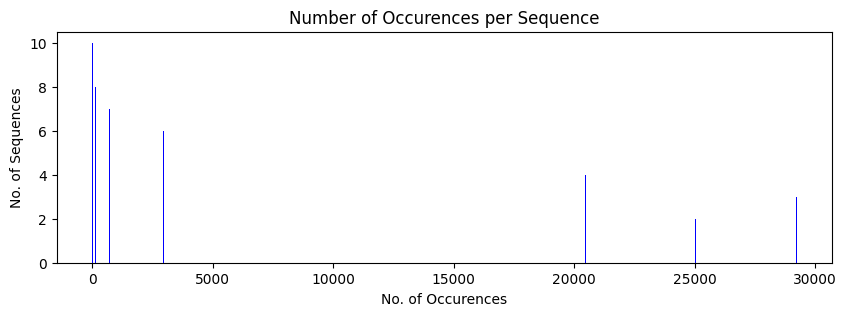

In [ ]:
fig = plt.figure(figsize = (10, 3))
 
# creating the bar plot
plt.bar(mp_300000_occ['size'], mp_300000_occ['index'], color ='blue', width=30)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [ ]:
mp_300000_occ = mp_300000_occ[['index', 'size']]
mp_300000_occ.head()

,index,size
0,3,29221
1,2,25039
2,4,20460
3,1,10564
4,5,9203


In [ ]:
print(mp_300000_occ.shape)

# saving to file, readable by recon functions
mp_300000_occ.to_csv('df_fill_in_mp_300000.tsv', sep='\t', index=False, header=False)

(10, 2)


### Rarefaction

In [ ]:
mp_300000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp_300000.tsv', sep='\t', header=None)
mp_300000_occ = mp_300000_occ.set_axis(['index', 'size'], axis=1)
mp_300000_occ.head()

,index,size
0,3,29221
1,2,25039
2,4,20460
3,1,10564
4,5,9203


In [ ]:
size_mp300000 = np.repeat(mp_300000_occ['index'].values, mp_300000_occ['size'].values)
size2_mp300000 = np.repeat(np.arange(1, len(size_mp300000)+1), size_mp300000)
np.random.shuffle(size2_mp300000)

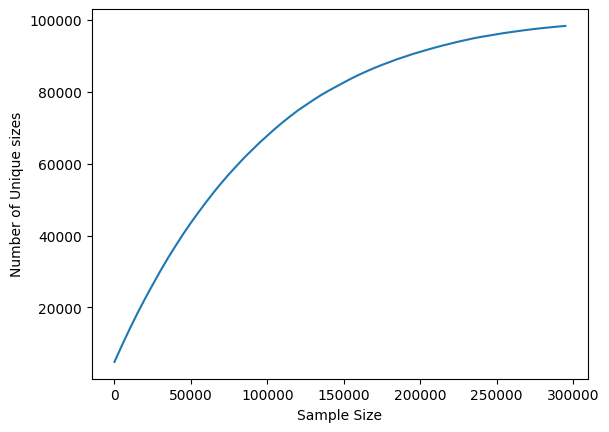

In [ ]:
# calculate the number of unique elements for every 5000 samples
step_size = 5000
num_steps = len(size2_mp300000) // step_size
unique_mp300_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size2_mp300000[:end_index], return_counts=True)
    unique_mp300_000[i] = len(counts)

# save to csv
np.savetxt("unique_mp300_000.csv", unique_mp300_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 5000*(len(unique_mp300_000)), 5000), unique_mp300_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [ ]:
mp_300000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp_300000.tsv', sep='\t', header=None)
mp_300000_occ = mp_300000_occ.set_axis(['index', 'size'], axis=1)
mp_300000_occ.head()

,index,size
0,3,29221
1,2,25039
2,4,20460
3,1,10564
4,5,9203


In [ ]:
# Shanon's Entropy Index
counts_mp3 = np.repeat(mp_300000_occ['index'], mp_300000_occ['size'])
shannon(counts_mp3)

16.45190295051549

In [ ]:
# Evenness
pielou_e(counts_mp3)

0.9919902647359087

In [ ]:
# Speices Richness
sum(mp_300000_occ['size'])

98289

# Mixed Poisson Population: Species Richness 1,000,000

## Mixed Poisson Population: 10,000

### Cleaning

In [62]:
mp_df_1 = pd.read_csv('mp_10000_1.tsv')
print(mp_df_1.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
mp_df_1 = mp_df_1.groupby(mp_df_1['AASeq']).aggregate(aggregation_functions)
mp_df_1 = mp_df_1.reset_index(drop=True)
mp_df_1.head()

           AASeq  size
0  species912441     1
1  species853564     1
2  species438918     1
3  species215377     1
4  species103679     1


,AASeq,size
0,species100026,1
1,species100043,1
2,species100094,1
3,species10036,1
4,species10038,1


### Clonotype Analysis

   index  size
0      1  9904
1      2    45
2      3     2


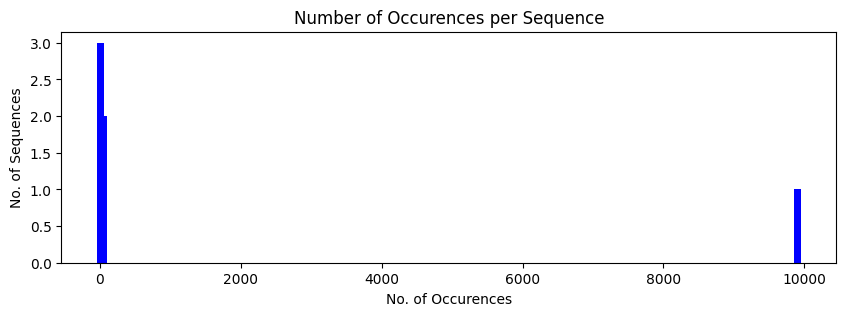

In [64]:
mp1_s10_000_occ = mp_df_1['size'].value_counts().to_frame()
mp1_s10_000_occ = mp1_s10_000_occ.reset_index()
print(mp1_s10_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(mp1_s10_000_occ['size'], mp1_s10_000_occ['index'], color ='blue', width=100)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [66]:
mp1_s10_000_occ = mp1_s10_000_occ[['index', 'size']]
print(mp1_s10_000_occ.head())

print(mp1_s10_000_occ.shape)

# saving to file, readable by recon functions
mp1_s10_000_occ.to_csv('df_fill_in_mp1_10_000.tsv', sep='\t', index=False, header=False)

   index  size
0      1  9904
1      2    45
2      3     2
(3, 2)


### Rarefaction

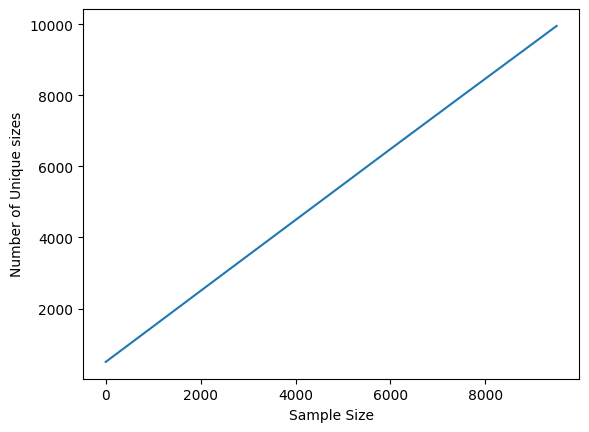

In [69]:
# mp1_s10_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_10_000.tsv', sep='\t', header=None)
mp1_s10_000_occ = mp1_s10_000_occ.set_axis(['index', 'size'], axis=1)

size1_m100000 = np.repeat(mp1_s10_000_occ['index'].values, mp1_s10_000_occ['size'].values)
size12_m100000 = np.repeat(np.arange(1, len(size1_m100000)+1), size1_m100000)
np.random.shuffle(size12_m100000)

# calculate the number of unique elements for every 500 samples
step_size = 500
num_steps = len(size12_m100000) // step_size
unique1_m10_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_m100000[:end_index], return_counts=True)
    unique1_m10_000[i] = len(counts)

# save to csv
np.savetxt("unique1_m10_000.csv", unique1_m10_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 500*(len(unique1_m10_000)), 500), unique1_m10_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [70]:
# mp1_s10_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_10_000.tsv', sep='\t', header=None)
mp1_s10_000_occ = mp1_s10_000_occ.set_axis(['index', 'size'], axis=1)
print(mp1_s10_000_occ.head())

# Shanon's Entropy Index
counts_mp_1 = np.repeat(mp1_s10_000_occ['index'], mp1_s10_000_occ['size'])
print('Shannon: ', shannon(counts_mp_1))

# Evenness
print('Evenness: ', pielou_e(counts_mp_1))

# Speices Richness
print('Species Richness: ', sum(mp1_s10_000_occ['size']))

   index  size
0      1  9904
1      2    45
2      3     2
Shannon:  13.277761402049014
Evenness:  0.9997843177344321
Species Richness:  9951


## Mixed Poisson Population: 100,000

### Cleaning

In [71]:
mp_df_2 = pd.read_csv('mp_100000_1.tsv')
print(mp_df_2.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
mp_df_2 = mp_df_2.groupby(mp_df_2['AASeq']).aggregate(aggregation_functions)
mp_df_2 = mp_df_2.reset_index(drop=True)
mp_df_2.head()

           AASeq  size
0  species131412     1
1  species994312     1
2  species469158     1
3  species205020     1
4  species285176     1


,AASeq,size
0,species100021,1
1,species100025,1
2,species100032,1
3,species100088,1
4,species100096,1


### Clonotype Analysis

   index   size
0      1  91615
1      2   4039
2      3    101
3      4      1


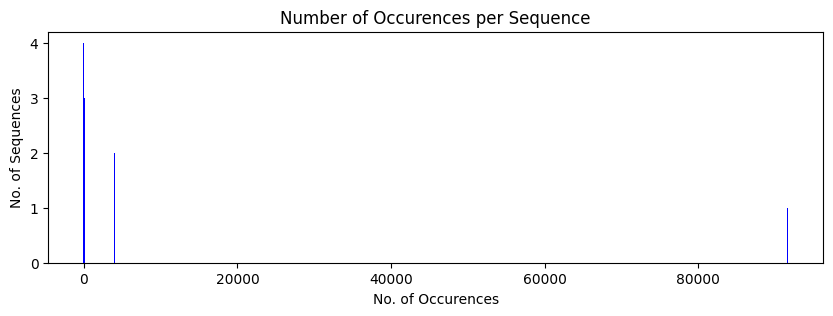

In [75]:
mp1_s100_000_occ = mp_df_2['size'].value_counts().to_frame()
mp1_s100_000_occ = mp1_s100_000_occ.reset_index()
print(mp1_s100_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(mp1_s100_000_occ['size'], mp1_s100_000_occ['index'], color ='blue', width=100)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [81]:
mp1_s100_000_occ = mp1_s100_000_occ[['index', 'size']]
print(mp1_s100_000_occ.head())

print(mp1_s100_000_occ.shape)

# saving to file, readable by recon functions
mp1_s100_000_occ.to_csv('df_fill_in_mp1_100_000.tsv', sep='\t', index=False, header=False)

   index   size
0      1  91615
1      2   4039
2      3    101
3      4      1
(4, 2)


### Rarefaction

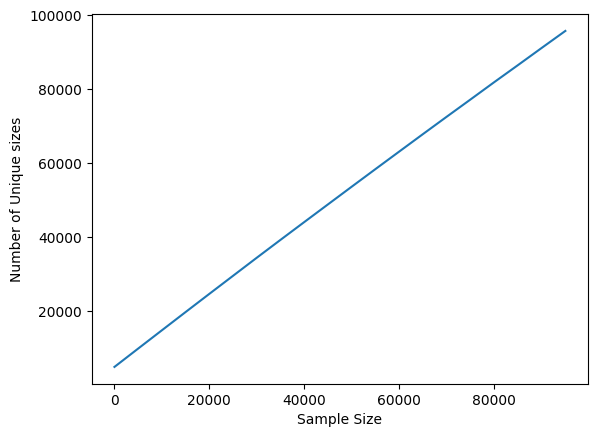

In [86]:
# mp1_s100_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_100_000.tsv', sep='\t', header=None)
mp1_s100_000_occ = mp1_s100_000_occ.set_axis(['index', 'size'], axis=1)

size1_m1000000 = np.repeat(mp1_s100_000_occ['index'].values, mp1_s100_000_occ['size'].values)
size12_m1000000 = np.repeat(np.arange(1, len(size1_m1000000)+1), size1_m1000000)
np.random.shuffle(size12_m1000000)

# calculate the number of unique elements for every 5000 samples
step_size = 5000
num_steps = len(size12_m1000000) // step_size
unique1_m100_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_m1000000[:end_index], return_counts=True)
    unique1_m100_000[i] = len(counts)

# save to csv
np.savetxt("unique1_m100_000.csv", unique1_m100_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 5000*(len(unique1_m100_000)), 5000), unique1_m100_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [90]:
# mp1_s100_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_100_000.tsv', sep='\t', header=None)
mp1_s100_000_occ = mp1_s100_000_occ.set_axis(['index', 'size'], axis=1)
print(mp1_s100_000_occ.head())

# Shanon's Entropy Index
counts_mp_2 = np.repeat(mp1_s100_000_occ['index'], mp1_s100_000_occ['size'])
print('Shannon: ', shannon(counts_mp_2))

# Evenness
print('Evenness: ', pielou_e(counts_mp_2))

# Speices Richness
print('Species Richness: ', sum(mp1_s100_000_occ['size']))

   index   size
0      1  91615
1      2   4039
2      3    101
3      4      1
Shannon:  16.52397803805962
Evenness:  0.9986041503293919
Species Richness:  95756


## Mixed Poisson Population: 300,000

### Cleaning

In [72]:
mp_df_3 = pd.read_csv('mp_300000_1.tsv')
print(mp_df_3.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
mp_df_3 = mp_df_3.groupby(mp_df_3['AASeq']).aggregate(aggregation_functions)
mp_df_3 = mp_df_3.reset_index(drop=True)
mp_df_3.head()

           AASeq  size
0  species449457     1
1  species613761     1
2  species984528     1
3  species717954     1
4  species331640     1


,AASeq,size
0,species0,1
1,species100000,1
2,species100001,1
3,species100002,1
4,species100009,1


### Clonotype Analysis

   index    size
0      1  230038
1      2   31069
2      3    2429
3      4     123
4      5       9


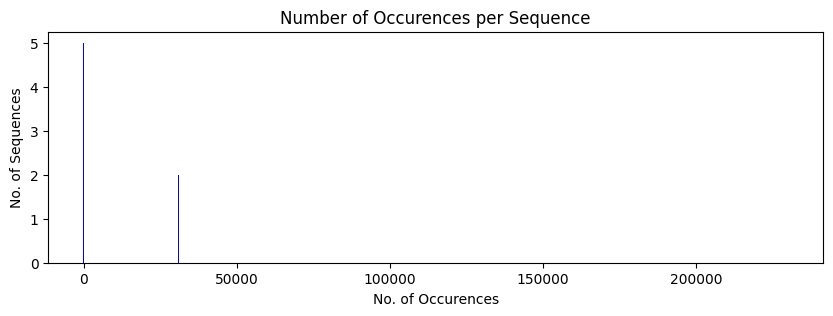

In [76]:
mp1_s300_000_occ = mp_df_3['size'].value_counts().to_frame()
mp1_s300_000_occ = mp1_s300_000_occ.reset_index()
print(mp1_s300_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(mp1_s300_000_occ['size'], mp1_s300_000_occ['index'], color ='blue', width=100)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [82]:
mp1_s300_000_occ = mp1_s300_000_occ[['index', 'size']]
print(mp1_s300_000_occ.head())

print(mp1_s300_000_occ.shape)

# saving to file, readable by recon functions
mp1_s300_000_occ.to_csv('df_fill_in_mp1_300_000.tsv', sep='\t', index=False, header=False)

   index    size
0      1  230038
1      2   31069
2      3    2429
3      4     123
4      5       9
(5, 2)


### Rarefaction

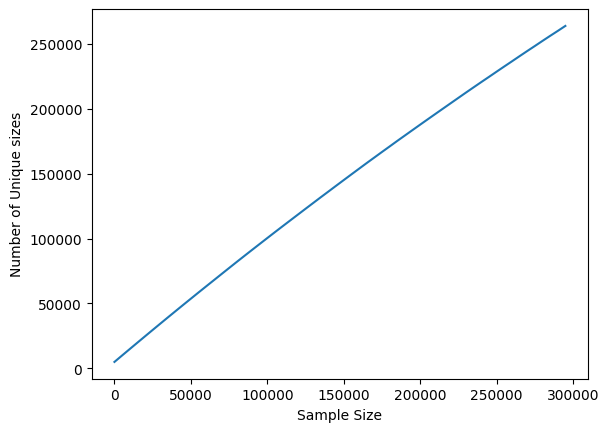

In [87]:
# mp1_s300_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_300_000.tsv', sep='\t', header=None)
mp1_s300_000_occ = mp1_s300_000_occ.set_axis(['index', 'size'], axis=1)

size1_m3000000 = np.repeat(mp1_s300_000_occ['index'].values, mp1_s300_000_occ['size'].values)
size12_m3000000 = np.repeat(np.arange(1, len(size1_m3000000)+1), size1_m3000000)
np.random.shuffle(size12_m3000000)

# calculate the number of unique elements for every 5000 samples
step_size = 5000
num_steps = len(size12_m3000000) // step_size
unique1_m300_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_m3000000[:end_index], return_counts=True)
    unique1_m300_000[i] = len(counts)

# save to csv
np.savetxt("unique1_m300_000.csv", unique1_m300_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 5000*(len(unique1_m300_000)), 5000), unique1_m300_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [91]:
# mp1_s300_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_300_000.tsv', sep='\t', header=None)
mp1_s300_000_occ = mp1_s300_000_occ.set_axis(['index', 'size'], axis=1)
print(mp1_s300_000_occ.head())

# Shanon's Entropy Index
counts_mp_3 = np.repeat(mp1_s300_000_occ['index'], mp1_s300_000_occ['size'])
print('Shannon: ', shannon(counts_mp_3))

# Evenness
print('Evenness: ', pielou_e(counts_mp_3))

# Speices Richness
print('Species Richness: ', sum(mp1_s300_000_occ['size']))

   index    size
0      1  230038
1      2   31069
2      3    2429
3      4     123
4      5       9
Shannon:  17.945349280134558
Evenness:  0.9965008655180361
Species Richness:  263668


## Mixed Poisson Population: 1,000,000

### Cleaning

In [73]:
mp_df_4 = pd.read_csv('mp_1000000_1.tsv')
print(mp_df_4.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
mp_df_4 = mp_df_4.groupby(mp_df_4['AASeq']).aggregate(aggregation_functions)
mp_df_4 = mp_df_4.reset_index(drop=True)
mp_df_4.head()

           AASeq  size
0  species401940     1
1  species974555     1
2  species337182     1
3  species717517     1
4  species231104     1


,AASeq,size
0,species0,1
1,species1,2
2,species10,2
3,species100,1
4,species10000,1


### Clonotype Analysis

   index    size
0      1  397567
1      2  195834
2      3   54950
3      4    9785
4      5    1207


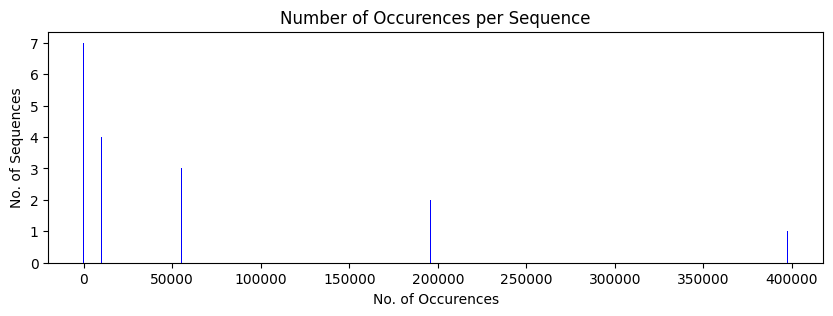

In [83]:
mp1_s1_000_000_occ = mp_df_4['size'].value_counts().to_frame()
mp1_s1_000_000_occ = mp1_s1_000_000_occ.reset_index()
print(mp1_s1_000_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(mp1_s1_000_000_occ['size'], mp1_s1_000_000_occ['index'], color ='blue', width=500)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [84]:
mp1_s1_000_000_occ = mp1_s1_000_000_occ[['index', 'size']]
print(mp1_s1_000_000_occ.head())

print(mp1_s1_000_000_occ.shape)

# saving to file, readable by recon functions
mp1_s1_000_000_occ.to_csv('df_fill_in_mp1_1_000_000.tsv', sep='\t', index=False, header=False)

   index    size
0      1  397567
1      2  195834
2      3   54950
3      4    9785
4      5    1207
(7, 2)


### Rarefaction

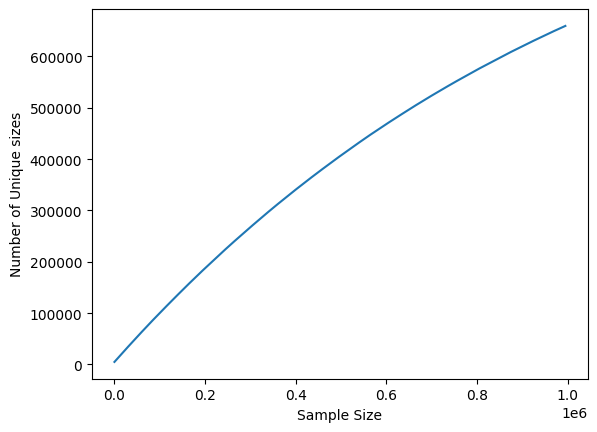

In [88]:
# mp1_s1_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_1_000_000.tsv', sep='\t', header=None)
mp1_s1_000_000_occ = mp1_s1_000_000_occ.set_axis(['index', 'size'], axis=1)

size1_m10000000 = np.repeat(mp1_s1_000_000_occ['index'].values, mp1_s1_000_000_occ['size'].values)
size12_m10000000 = np.repeat(np.arange(1, len(size1_m10000000)+1), size1_m10000000)
np.random.shuffle(size12_m10000000)

# calculate the number of unique elements for every 5000 samples
step_size = 5000
num_steps = len(size12_m10000000) // step_size
unique1_m1_000_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_m10000000[:end_index], return_counts=True)
    unique1_m1_000_000[i] = len(counts)

# save to csv
np.savetxt("unique1_m1_000_000.csv", unique1_m1_000_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 5000*(len(unique1_m1_000_000)), 5000), unique1_m1_000_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [92]:
# mp1_s1_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_1_000_000.tsv', sep='\t', header=None)
mp1_s1_000_000_occ = mp1_s1_000_000_occ.set_axis(['index', 'size'], axis=1)
print(mp1_s1_000_000_occ.head())

# Shanon's Entropy Index
counts_mp_4 = np.repeat(mp1_s1_000_000_occ['index'], mp1_s1_000_000_occ['size'])
print('Shannon: ', shannon(counts_mp_4))

# Evenness
print('Evenness: ', pielou_e(counts_mp_4))

# Speices Richness
print('Species Richness: ', sum(mp1_s1_000_000_occ['size']))

   index    size
0      1  397567
1      2  195834
2      3   54950
3      4    9785
4      5    1207
Shannon:  19.184401338801525
Evenness:  0.9924196518874608
Species Richness:  659465


## Mixed Poisson Population: 2,000,000

### Cleaning

In [74]:
mp_df_5 = pd.read_csv('mp_2000000_1.tsv')
print(mp_df_5.head())
aggregation_functions = {'AASeq': 'first', 'size': 'sum'}
mp_df_5 = mp_df_5.groupby(mp_df_5['AASeq']).aggregate(aggregation_functions)
mp_df_5 = mp_df_5.reset_index(drop=True)
mp_df_5.head()

           AASeq  size
0  species895607     1
1   species63835     1
2  species652537     1
3  species973006     1
4  species848732     1


,AASeq,size
0,species0,1
1,species1,2
2,species10,1
3,species100,2
4,species1000,1


### Clonotype Analysis

   index    size
0      2  320454
1      1  270970
2      3  205284
3      4   82550
4      5   22304


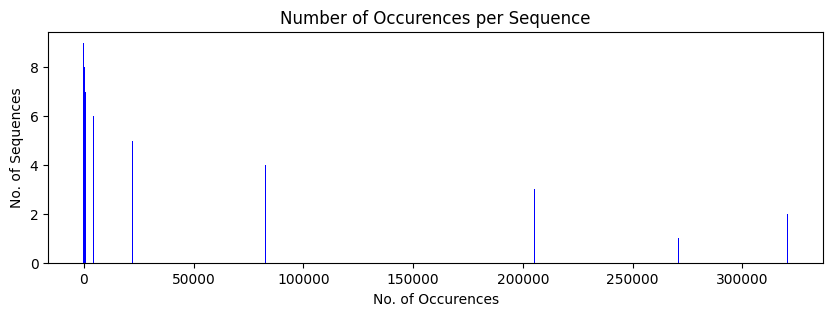

In [80]:
mp1_s2_000_000_occ = mp_df_5['size'].value_counts().to_frame()
mp1_s2_000_000_occ = mp1_s2_000_000_occ.reset_index()
print(mp1_s2_000_000_occ.head())

fig = plt.figure(figsize = (10, 3))
# creating the bar plot
plt.bar(mp1_s2_000_000_occ['size'], mp1_s2_000_000_occ['index'], color ='blue', width=500)
 
plt.xlabel("No. of Occurences")
plt.ylabel("No. of Sequences")
# plt.ylim(0, 42611585)
plt.title("Number of Occurences per Sequence")
plt.show()

### Formatting for Recon

In [85]:
mp1_s2_000_000_occ = mp1_s2_000_000_occ[['index', 'size']]
print(mp1_s2_000_000_occ.head())

print(mp1_s2_000_000_occ.shape)

# saving to file, readable by recon functions
mp1_s2_000_000_occ.to_csv('df_fill_in_mp1_2_000_000.tsv', sep='\t', index=False, header=False)

   index    size
0      2  320454
1      1  270970
2      3  205284
3      4   82550
4      5   22304
(9, 2)


### Rarefaction

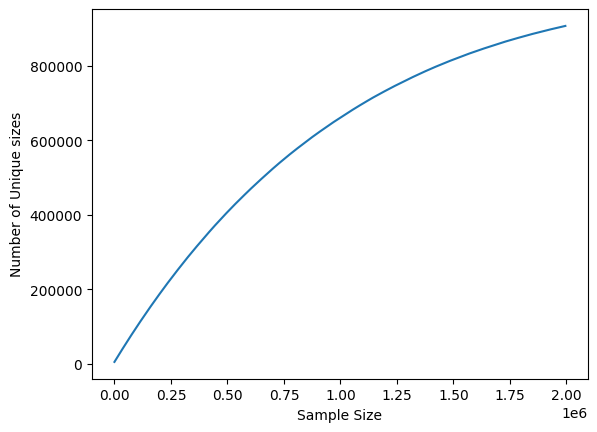

In [89]:
# mp1_s2_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_2_000_000.tsv', sep='\t', header=None)
mp1_s2_000_000_occ = mp1_s2_000_000_occ.set_axis(['index', 'size'], axis=1)

size1_m20000000 = np.repeat(mp1_s2_000_000_occ['index'].values, mp1_s2_000_000_occ['size'].values)
size12_m20000000 = np.repeat(np.arange(1, len(size1_m20000000)+1), size1_m20000000)
np.random.shuffle(size12_m20000000)

# calculate the number of unique elements for every 5000 samples
step_size = 5000
num_steps = len(size12_m20000000) // step_size
unique1_m2_000_000 = np.zeros(num_steps)
for i in range(num_steps):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    _, counts = np.unique(size12_m20000000[:end_index], return_counts=True)
    unique1_m2_000_000[i] = len(counts)

# save to csv
np.savetxt("unique1_m2_000_000.csv", unique1_m2_000_000, delimiter=",")

# plot rarefaction curve
plt.plot(range(1, 5000*(len(unique1_m2_000_000)), 5000), unique1_m2_000_000)
plt.xlabel('Sample Size')
plt.ylabel('Number of Unique sizes')
plt.show()

### Traditional Diversity Measures

In [93]:
# mp1_s2_000_000_occ = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_2_000_000.tsv', sep='\t', header=None)
mp1_s2_000_000_occ = mp1_s2_000_000_occ.set_axis(['index', 'size'], axis=1)
print(mp1_s2_000_000_occ.head())

# Shanon's Entropy Index
counts_mp_5 = np.repeat(mp1_s2_000_000_occ['index'], mp1_s2_000_000_occ['size'])
print('Shannon: ', shannon(counts_mp_5))

# Evenness
print('Evenness: ', pielou_e(counts_mp_5))

# Speices Richness
print('Species Richness: ', sum(mp1_s2_000_000_occ['size']))

   index    size
0      2  320454
1      1  270970
2      3  205284
3      4   82550
4      5   22304
Shannon:  19.623335062486397
Evenness:  0.99157832489311
Species Richness:  906533
